<font size="6"><b>Analyzing and Predicting the Voting Turnout Using Demographic Features</b></font>\
<font size="3">Team members:Chris Chang, Zhiqi Fang, Guohui Li, YuPeng Wang, Yu Shu, Ava Wang
    
<font size="4"> <b> Project purpose: </b></font> <font size = "3">How do demographic features affect voter turnout in California, Texas, and Maine? Firstly, we picked three typically different states, in terms of location, population, and historical political tendentiousness, to analyze, visualize and compare the results, which unveil profound insights about the three states. Secondly, we would use multiple ML models to predict the Activeness of voters by adopting various attributes as features and labels. The result can be a great resource to refer to for the presidential election in 2024.</font>
    
<font size="3"> <b> Motivation:</b></font> <font size = "3"> Who would be more likely to vote? Demographic information provides us with a profile of a person, and it allows us to study and speculate on people's behavior. This analysis aims to show registered active and inactive voters' demographic statistics in California, Maine, and Texas. Although with a limited scope, we hope to present insights into voters' data and provide researchers interested in this topic.</font>
    
<font size="3"> <b>Reason of selecting dataset:</b></font> <font size="3">CA and TX are the top two most populated States, and Maine has less population. CA is a blues state, TX is a red state, while Maine is a swing state. We expect demographic features of voters in these three states to differentiate, thus providing us with information to analyze. Furthermore, we think one person's information would meet the needed information for us to predict the voting turnout. </font>
    
<font size="3"><b>Data Source:</b></font> <font size="3">The center for antiracist research (CAR) at BU recently acquired a 3-year subscription to a national voter file for the US. The voter files contain records for every registered voter in the US. A voter files exists for each state. Each file contains geographic, demographic and household information. It also contains the history of voting for each registered voter.</font>
    
<font size="3"><b>Dataset</b>
After selecting columns, the description of the dataset we use is below:
    
 |Column Name |Description|
 |--|--|   
 |LALVOTERID|Permanent and unique ID generated by L2 for a single voter|
 |Voters_Active|A for active, I for inactive|
 |Voters_StateVoterID|State-supplied voter ID|
 |Residence_Addresses_State|Address State|
 |Residence_Addresses_Zip|Zip code|
 |Voters_Gender|voters'gender|
 |Voters_Age|voters'age|
 |Parties_Description|Full name of official party. See Parties tab|
 |Ethnic_Description|voters' ethinicity|
 |Religions_Description|Modeled data based on first name, last name and census data|
 |Languages_Description|Based on first and last name analysis and self-reported data|
 |MilitaryStatus_Description|If the voter is veteran|
 |MaritalStatus_Description|Married,Non-Traditional|
 |Precinct|District|
 |CommercialData_Education|voter's education level|
 |CommercialData_EstHomeValue|voter's home value|
 |CommercialData_EstimatedHHIncome|voter's income level,is a range|
 |CommercialData_EstimatedHHIncomeAmount|voter's income amount|
 |CommercialData_ISPSA|Index of Social Position for Small Areas" is a mix of education and income information| 
 |CommercialData_AreaPcntHHMarriedCoupleNoChild|percentage of how many couple have no child|
 |CommercialData_AreaPcntHHMarriedCoupleWithChild|percentage of how many couple have a child|
 | CommercialData_AreaPcntHHWithChildren|percentage of how many couple have children|
 |CommercialData_PoliticalContributerInHome|Single digit number of contributions made to political causes by members of this household|
    
## <font size="5"><b> Agenda<b></font>
<font size="3"><b><p> I.Import file and file transformation<p><b></font>
<font size="3"><b><p> II.Data Cleaning<p><b></font>
<font size="3"><b>III.Exploratory Data Analysis<b></font>\
<font size="3"><b><p> IV.Machine Learning<p><b></font>
<font size="3"><b><p> V.Challenges and Solutions<p><b></font>


## <font size="5"><b>Import file and Data Cleaning</b> </font> 
<font size="3"> For quicklier accessing the file, we select the columns we need, and transform the file to a parquet file which is smaller, so the later work would be more efficient.we tranfered the file into qarquet file because we will be dealing with CA and TX which are the two most populated states. </font>
    

<font size = "4"> For Data Cleaning part, we check how many null values for each colum, and decide how should we handle these missing values.</font>

In [1]:
#Read the parquet file 
CA_df = spark.read.parquet("gs://dataset-team1/CA_df.parquet")
#Read the TX parquet file 
TX_df = spark.read.parquet("gs://dataset-team1/TX_df.parquet")
#ME file
ME_df = spark.read.parquet("gs://dataset-team1/ME_df.parquet")

In [2]:
from pyspark.sql.functions import col,isnan,when,count
#TX
[(c, TX_df.where(col(c).isNull()).count()) for c in TX_df.columns]

[('SEQUENCE', 0),
 ('LALVOTERID', 0),
 ('Voters_Active', 0),
 ('Voters_StateVoterID', 0),
 ('Residence_Addresses_State', 0),
 ('Residence_Addresses_Zip', 5145),
 ('Voters_Gender', 10512),
 ('Voters_Age', 7448),
 ('Parties_Description', 0),
 ('Ethnic_Description', 975077),
 ('CountyEthnic_LALEthnicCode', 12042914),
 ('CountyEthnic_Description', 12042914),
 ('Religions_Description', 9592159),
 ('Languages_Description', 8783558),
 ('MilitaryStatus_Description', 15983112),
 ('MaritalStatus_Description', 9297834),
 ('Precinct', 35160),
 ('City_Council_Commissioner_District', 10327340),
 ('City_Ward', 15051602),
 ('City_Mayoral_District', 15983112),
 ('Board_of_Education_District', 1132699),
 ('Board_of_Education_SubDistrict', 15983112),
 ('CommercialData_Education', 6085819),
 ('CommercialData_EstHomeValue', 458781),
 ('CommercialData_EstimatedHHIncome', 413231),
 ('CommercialData_EstimatedHHIncomeAmount', 413231),
 ('CommercialData_ISPSA', 795004),
 ('CommercialData_AreaPcntHHMarriedCouple

In [5]:
#ME
[(c, ME_df.where(col(c).isNull()).count()) for c in ME_df.columns]

[('SEQUENCE', 0),
 ('LALVOTERID', 0),
 ('Voters_Active', 0),
 ('Voters_StateVoterID', 0),
 ('Residence_Addresses_State', 0),
 ('Residence_Addresses_Zip', 1425),
 ('Voters_Gender', 8435),
 ('Voters_Age', 1728),
 ('Parties_Description', 0),
 ('Ethnic_Description', 81594),
 ('CountyEthnic_LALEthnicCode', 1040452),
 ('CountyEthnic_Description', 1040452),
 ('Religions_Description', 640839),
 ('Languages_Description', 566242),
 ('MilitaryStatus_Description', 1040452),
 ('MaritalStatus_Description', 578676),
 ('Precinct', 476),
 ('City_Council_Commissioner_District', 1040452),
 ('City_Ward', 820335),
 ('City_Mayoral_District', 1040452),
 ('Board_of_Education_District', 1040452),
 ('Board_of_Education_SubDistrict', 1040452),
 ('CommercialData_Education', 431346),
 ('CommercialData_EstHomeValue', 80124),
 ('CommercialData_EstimatedHHIncome', 69918),
 ('CommercialData_EstimatedHHIncomeAmount', 69917),
 ('CommercialData_ISPSA', 122220),
 ('CommercialData_AreaPcntHHMarriedCoupleNoChild', 122220),


In [6]:
ME_df.count()

1040452

In [7]:
CA_df.count()

21779518

In [8]:
TX_df.count()

15983112

<font size = "4">Because we found several columns contain missing value close to 99% of the total rows, we think they won't be useful.</font>

In [2]:
# Since some are all null values and "City_Ward" we think is not useful, we drop few columns
cols = ("CountyEthnic_LALEthnicCode","CountyEthnic_Description","City_Council_Commissioner_District","City_Ward","City_Mayoral_District","Board_of_Education_District","Board_of_Education_SubDistrict")

ME_df.drop(*cols) \
   .printSchema()

root
 |-- SEQUENCE: integer (nullable = true)
 |-- LALVOTERID: string (nullable = true)
 |-- Voters_Active: string (nullable = true)
 |-- Voters_StateVoterID: integer (nullable = true)
 |-- Residence_Addresses_State: string (nullable = true)
 |-- Residence_Addresses_Zip: integer (nullable = true)
 |-- Voters_Gender: string (nullable = true)
 |-- Voters_Age: integer (nullable = true)
 |-- Parties_Description: string (nullable = true)
 |-- Ethnic_Description: string (nullable = true)
 |-- Religions_Description: string (nullable = true)
 |-- Languages_Description: string (nullable = true)
 |-- MilitaryStatus_Description: string (nullable = true)
 |-- MaritalStatus_Description: string (nullable = true)
 |-- Precinct: string (nullable = true)
 |-- CommercialData_Education: string (nullable = true)
 |-- CommercialData_EstHomeValue: string (nullable = true)
 |-- CommercialData_EstimatedHHIncome: string (nullable = true)
 |-- CommercialData_EstimatedHHIncomeAmount: string (nullable = true)
 |-

 <font size="4">From last section, we found our most variables are categorical data, which maske us impossible to replace missing values with mean/mdian for categorical data.

In [3]:
ME_df = ME_df.drop(*cols) 
CA_df = CA_df.drop(*cols) 
TX_df = TX_df.drop(*cols) 

<font size = "3"> Replace missing age with mean age and replace missing Estimated Income Amount with mean income amount</font>

In [4]:
from pyspark.sql.functions import mean,col
from pyspark.sql.functions import regexp_replace
import pyspark.sql.functions as f

In [5]:
CA_df.createOrReplaceTempView("CA_df")
TX_df.createOrReplaceTempView("TX_df")
ME_df.createOrReplaceTempView("ME_df")
meanAge = ME_df.select(mean('Voters_Age')).show()
ME_df = ME_df.withColumn('CommercialData_EstimatedHHIncomeAmount', f.regexp_replace('CommercialData_EstimatedHHIncomeAmount', '[$,]', '').cast('double'))
meanIncomeamount = ME_df.select(mean('CommercialData_EstimatedHHIncomeAmount')).show()
meanAge = TX_df.select(mean('Voters_Age')).show()
TX_df = TX_df.withColumn('CommercialData_EstimatedHHIncomeAmount', f.regexp_replace('CommercialData_EstimatedHHIncomeAmount', '[$,]', '').cast('double'))
meanIncomeamount = TX_df.select(mean('CommercialData_EstimatedHHIncomeAmount')).show()
meanAge = CA_df.select(mean('Voters_Age')).show()
CA_df = CA_df.withColumn('CommercialData_EstimatedHHIncomeAmount', f.regexp_replace('CommercialData_EstimatedHHIncomeAmount', '[$,]', '').cast('double'))
meanIncomeamount = CA_df.select(mean('CommercialData_EstimatedHHIncomeAmount')).show()

22/05/01 19:29:00 WARN org.apache.spark.sql.catalyst.util.package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


+------------------+
|   avg(Voters_Age)|
+------------------+
|52.722588483562525|
+------------------+



+-------------------------------------------+
|avg(CommercialData_EstimatedHHIncomeAmount)|
+-------------------------------------------+
|                           84611.4300937112|
+-------------------------------------------+



+------------------+
|   avg(Voters_Age)|
+------------------+
|48.325085392381816|
+------------------+



+-------------------------------------------+
|avg(CommercialData_EstimatedHHIncomeAmount)|
+-------------------------------------------+
|                          96455.47758682292|
+-------------------------------------------+



+-----------------+
|  avg(Voters_Age)|
+-----------------+
|48.69164957783534|
+-----------------+



+-------------------------------------------+
|avg(CommercialData_EstimatedHHIncomeAmount)|
+-------------------------------------------+
|                         113854.38409897524|
+-------------------------------------------+



In [6]:
#Fill na of Age column with mean 
CA_df = CA_df.fillna(value = 48.69, subset = ['Voters_Age']) 
CA_df = CA_df.fillna(value = 113854, subset = ['CommercialData_EstimatedHHIncomeAmount']) 
TX_df = TX_df.fillna(value = 48.33, subset = ['Voters_Age']) 
TX_df = TX_df.fillna(value = 96455, subset = ['CommercialData_EstimatedHHIncomeAmount']) 
ME_df = ME_df.fillna(value = 53, subset = ['Voters_Age']) 
ME_df = ME_df.fillna(value = 84611, subset = ['CommercialData_EstimatedHHIncomeAmount']) 

In [7]:
#Check
print(ME_df.filter(col("Voters_Age").isNull()).count())
print(ME_df.filter(col("CommercialData_EstimatedHHIncomeAmount").isNull()).count())

#Check
print(CA_df.filter(col("Voters_Age").isNull()).count()) 
print(CA_df.filter(col("CommercialData_EstimatedHHIncomeAmount").isNull()).count())

#Check
print(TX_df.filter(col("Voters_Age").isNull()).count()) 
print(TX_df.filter(col("CommercialData_EstimatedHHIncomeAmount").isNull()).count()) 

0
0
0
0
0
0


<font size = "3">Theoretically, missing values in categorical data can not be replaced by the mean or median, so they should be dropped. However, for EDA data volume purpose, instead of droppping all missing values of categorical variables at the beginning, we decide to drop missing values for each problem, so that we could keep as much data volume as possible at this stage.</font>

## <font size = "5"><b> Exploratory Data Analysis</b></font>

<font size = "4"> For these part, we go over some demographic attributes that we think would be interesting to look at. <P>1. We would look at how each variable differenciate in the total population, and look how active voters group different from inactive voters group. 
<P>2. During this process, we may find attributes inappropriate to be variables of predicting voing turn out rate. We would likde to show our process but mension we will exclude such variables from later work.

In [5]:
#import packages
! pip install pyspark-dist-explore
from pyspark_dist_explore import hist
import matplotlib.pyplot as plt
from pyspark.sql.functions import percentile_approx
from pyspark.sql.functions import desc,col,skewness
import seaborn as sns


### <font size = "4"><b>Heat Map<b></font>

<font size = "4">Following we use a heat map to show generally the correlations among variables. From 0 to 1, the larger the number the stronger the correlation is.</font>

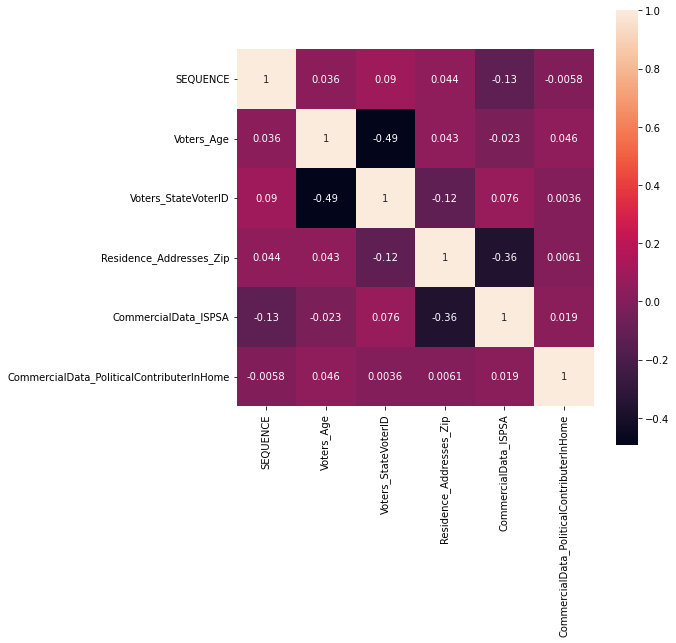

In [15]:
py_ME_df=ME_df.select('Voters_Active','SEQUENCE','Voters_Gender', 'Voters_Age', 'Voters_StateVoterID', 'Residence_Addresses_Zip', 'CommercialData_ISPSA', 'CommercialData_PoliticalContributerInHome').toPandas()
plt.subplots(figsize=(8, 8))
sns.heatmap(py_ME_df.corr(), annot=True, square=True)
plt.show()

<font size = "4"> firstly, we compare the number of active voters versus inactive voters for three states. We found people in CA are more actively engaging in voting. More TX people are inactive voters.

In [17]:
ME_AIgroup=ME_df.groupBy('Voters_Active').count()
CA_AIgroup=CA_df.groupBy('Voters_Active').count()
TX_AIgroup=TX_df.groupBy('Voters_Active').count()
ME_AIgroup.show()
CA_AIgroup.show()
TX_AIgroup.show()

+-------------+------+
|Voters_Active| count|
+-------------+------+
|            A|998155|
|            I| 42297|
+-------------+------+



+-------------+--------+
|Voters_Active|   count|
+-------------+--------+
|            A|21520126|
|            I|  259392|
+-------------+--------+



+-------------+--------+
|Voters_Active|   count|
+-------------+--------+
|            A|14706609|
|            I| 1276503|
+-------------+--------+



<font size="4"> Let's see the ratio of active and inactive voters. As we can see, there are much more active voters compared to inactive voters.CA has least inactive voters' ratio.

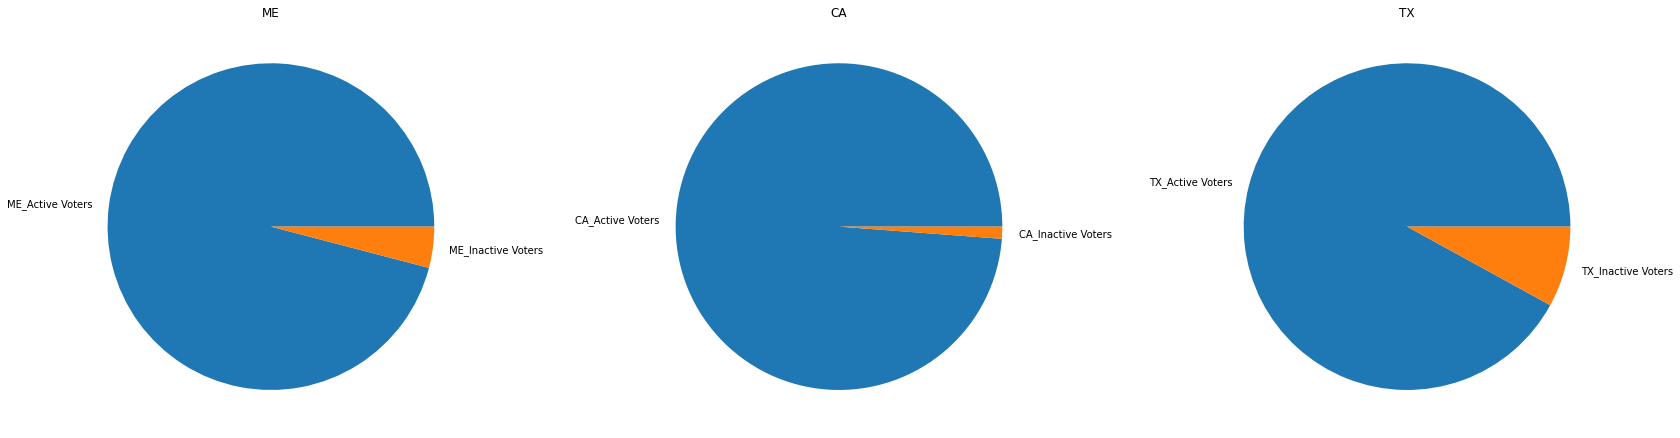

In [19]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,3, figsize = (24,12))
ax[0].pie([998155,42297], labels = ['ME_Active Voters','ME_Inactive Voters'])
ax[0].set_title('ME')
ax[1].pie([21520126,259392], labels = ['CA_Active Voters','CA_Inactive Voters'])
ax[1].set_title('CA')
ax[2].pie([14706609,1276503], labels = ['TX_Active Voters','TX_Inactive Voters'])
ax[2].set_title('TX')
fig.tight_layout(pad=3.0)
plt.show()

### <font size = "4"><b>Age and Gender</b></font>

<font size = "4">In this section, we investigate the descriptive stats of Age variable, and its distribution. Later we plan to see if the distribution differenciate between active group and the inactive group. We found that most inactive voters are younger, their age cluster around 20-30, and the mean age is 10 years smaller than active group. </font>
    
<font size = "4">  Comparing three states, ME active voters are older, the mean age of active and inactive voters in CA differenciate the least.

In [20]:
spark.sql("""select Voters_Active, mean(Voters_Age) from CA_df group by Voters_Active """).show()
spark.sql("""select Voters_Active, mean(Voters_Age) from TX_df group by Voters_Active """).show()
spark.sql("""select Voters_Active, mean(Voters_Age) from ME_df group by Voters_Active """).show()

+-------------+-----------------+
|Voters_Active| mean(Voters_Age)|
+-------------+-----------------+
|            A|48.76060591843594|
|            I|42.97059243342502|
+-------------+-----------------+



+-------------+------------------+
|Voters_Active|  mean(Voters_Age)|
+-------------+------------------+
|            A|48.898701060343356|
|            I|41.714265554440544|
+-------------+------------------+



+-------------+-----------------+
|Voters_Active| mean(Voters_Age)|
+-------------+-----------------+
|            A|52.97760497573546|
|            I|46.70173900682335|
+-------------+-----------------+



<font size = "4"> The histplot shows the age distribution, the inactive one clusters towards left, which is consistent with the mean of voters age.

In [174]:
# split active and inactive group for plotting
ME_Active_Group = ME_df.filter(ME_df.Voters_Active == "A")
ME_Inactive_Group = ME_df.filter(ME_df.Voters_Active == "I")
CA_Active_Group = CA_df.filter(CA_df.Voters_Active == "A")
CA_Inactive_Group = CA_df.filter(CA_df.Voters_Active == "I")
TX_Active_Group = TX_df.filter(TX_df.Voters_Active == "A")
TX_Inactive_Group = TX_df.filter(TX_df.Voters_Active == "I")

In [ ]:
ME_Active_Group = ME_Active_Group.select('Voters_Age').toPandas()
ME_Inactive_Group = ME_Inactive_Group.select('Voters_Age').toPandas()
CA_Active_Group = CA_Active_Group.select('Voters_Age').toPandas()
CA_Inactive_Group = CA_Inactive_Group.select('Voters_Age').toPandas()
TX_Active_Group = TX_Active_Group.select('Voters_Age').toPandas()
TX_Inactive_Group = TX_Inactive_Group.select('Voters_Age').toPandas()

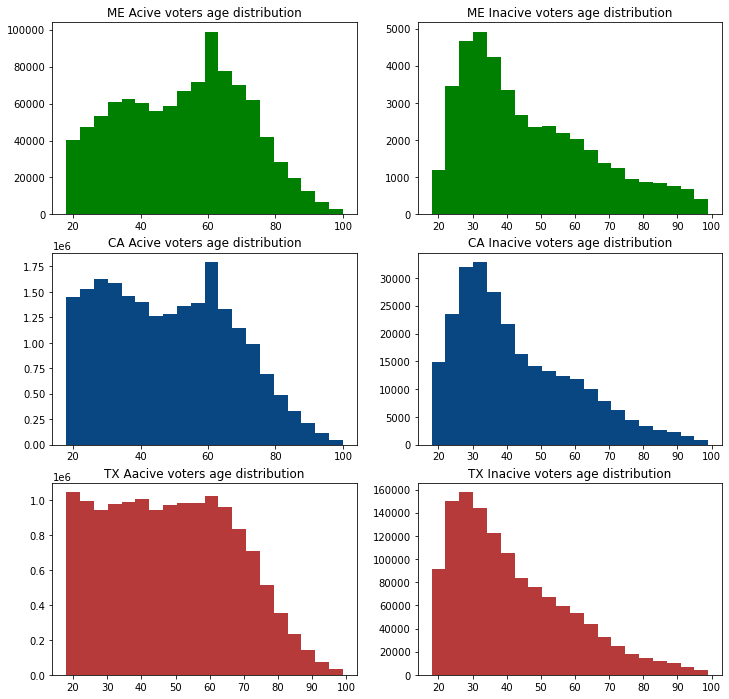

In [10]:
#Hist plot
fig, ax = plt.subplots(3,2, figsize = (12,12))
ax[0,0].hist(ME_Active_Group, bins = 20,label="Active",color = "Green")
ax[0,0].set_title('ME Acive voters age distribution')
ax[0,1].hist(ME_Inactive_Group, bins = 20,label="Inactive", color = "Green")
ax[0,1].set_title('ME Inacive voters age distribution')
ax[1,0].hist(CA_Active_Group,bins = 20,label="Aactive", color = "#094782")
ax[1,0].set_title('CA Acive voters age distribution')
ax[1,1].hist(CA_Inactive_Group,bins = 20,label="Inactive", color = "#094782")
ax[1,1].set_title('CA Inacive voters age distribution')
ax[2,0].hist(TX_Active_Group,bins = 20,label="Active",color = "#B73A3A")
ax[2,0].set_title('TX Aacive voters age distribution')
ax[2,1].hist(TX_Inactive_Group, bins = 20,label="Inactive", color = "#B73A3A")
ax[2,1].set_title('TX Inacive voters age distribution')
plt.show()

<font size = "4"> For our gender variable, we found that there were more female population compared to male population. Furthermore, when grouping our gender variable by age group, we found that at almost all age groups, the female population still  outweighs the male population. Since the numbers don't differenciate much, we decide not to include the plots here. </font>

In [12]:
print(ME_df.filter(ME_df.Voters_Gender=="M").count()/ME_df.filter("Voters_Gender IS NOT NULL").count()*100)
print(CA_df.filter(CA_df.Voters_Gender=="M").count()/CA_df.filter("Voters_Gender IS NOT NULL").count()*100)
print(TX_df.filter(TX_df.Voters_Gender=="M").count()/TX_df.filter("Voters_Gender IS NOT NULL").count()*100)

47.53041858806589


47.40654425898405


47.20093785607853


<font size = "4"> Generally, the age distribution of male and femal voters are very similar

### <font size = "4"><b>Ethnic and Language</b></font>
    
<font size = "4"> Is there a difference in the ethnic ratios in active voters and inactive voters? In terms of Ethnic groups, we found that the top three groups amongst the voters are English/Welsh, French, and Irish ethnicities. Furthermore, we found that most of the members in these ethnic groups are active voters, so there may be bias if we use this variable to determine voter turnout. We found the ethic ratios for active voters and inactive voters are not distinct much in ME and TX. </font>

In [6]:
#limit it to the ten highest ethnic
import numpy as np
me_Ethnic_Description=ME_df.groupby("Ethnic_Description").count().sort(desc("count")).limit(10).sort(("count")).toPandas()
ca_Ethnic_Description=CA_df.groupby("Ethnic_Description").count().sort(desc("count")).limit(10).sort(("count")).toPandas()
tx_Ethnic_Description=TX_df.groupby("Ethnic_Description").count().sort(desc("count")).limit(10).sort(("count")).toPandas()

In [7]:
# split active and inactive group for plotting
ME_Active_Group = ME_df.filter(ME_df.Voters_Active == "A")
ME_Inactive_Group = ME_df.filter(ME_df.Voters_Active == "I")
CA_Active_Group = CA_df.filter(CA_df.Voters_Active == "A")
CA_Inactive_Group = CA_df.filter(CA_df.Voters_Active == "I")
TX_Active_Group = TX_df.filter(TX_df.Voters_Active == "A")
TX_Inactive_Group = TX_df.filter(TX_df.Voters_Active == "I")


In [8]:
ame_Ethnic_=ME_Active_Group.groupby("Ethnic_Description").count().sort(desc("count")).limit(10).sort(("count")).toPandas()
ime_Ethnic_=ME_Inactive_Group.groupby("Ethnic_Description").count().sort(desc("count")).limit(10).sort(("count")).toPandas()
aca_Ethnic_=CA_Active_Group.groupby("Ethnic_Description").count().sort(desc("count")).limit(10).sort(("count")).toPandas()
ica_Ethnic_=CA_Inactive_Group.groupby("Ethnic_Description").count().sort(desc("count")).limit(10).sort(("count")).toPandas()
atx_Ethnic_=TX_Active_Group.groupby("Ethnic_Description").count().sort(desc("count")).limit(10).sort(("count")).toPandas()
itx_Ethnic_=TX_Inactive_Group.groupby("Ethnic_Description").count().sort(desc("count")).limit(10).sort(("count")).toPandas()

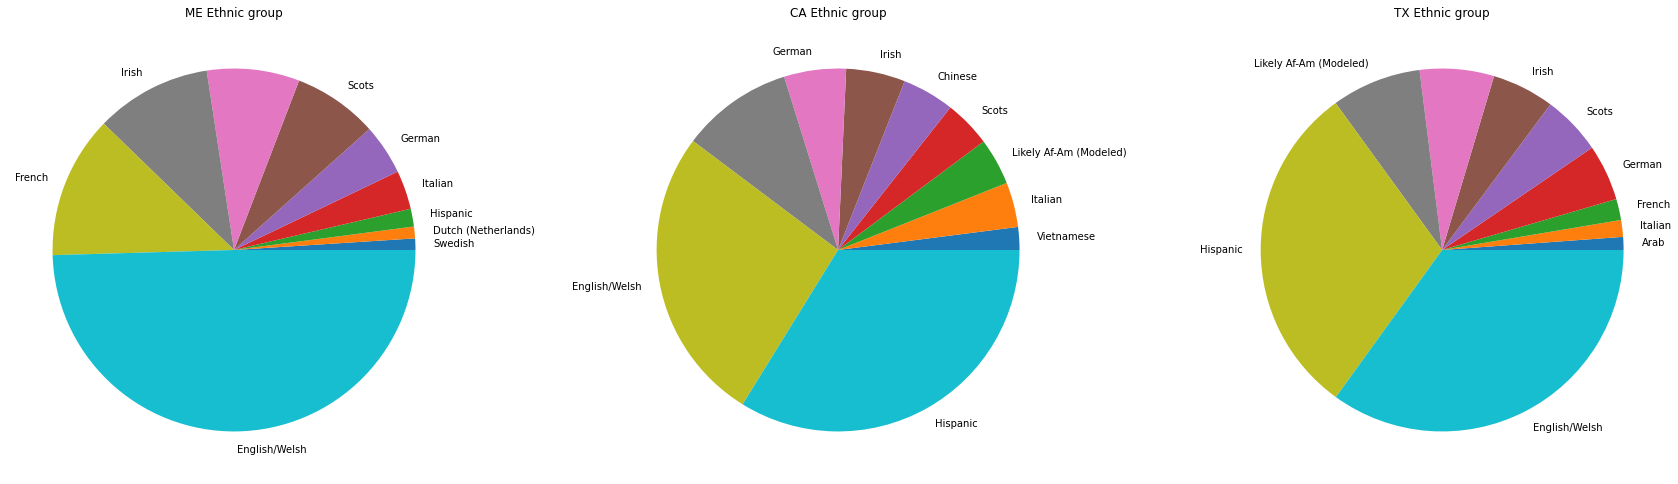

In [9]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,3, figsize = (24,12))
ax[0].pie(me_Ethnic_Description['count'], labels = me_Ethnic_Description['Ethnic_Description'])
ax[0].set_title('ME Ethnic group')
ax[1].pie(ca_Ethnic_Description['count'], labels = ca_Ethnic_Description['Ethnic_Description'])
ax[1].set_title('CA Ethnic group')
ax[2].pie(tx_Ethnic_Description['count'], labels = tx_Ethnic_Description['Ethnic_Description'])
ax[2].set_title('TX Ethnic group')
fig.tight_layout(pad=3.0)
plt.show()

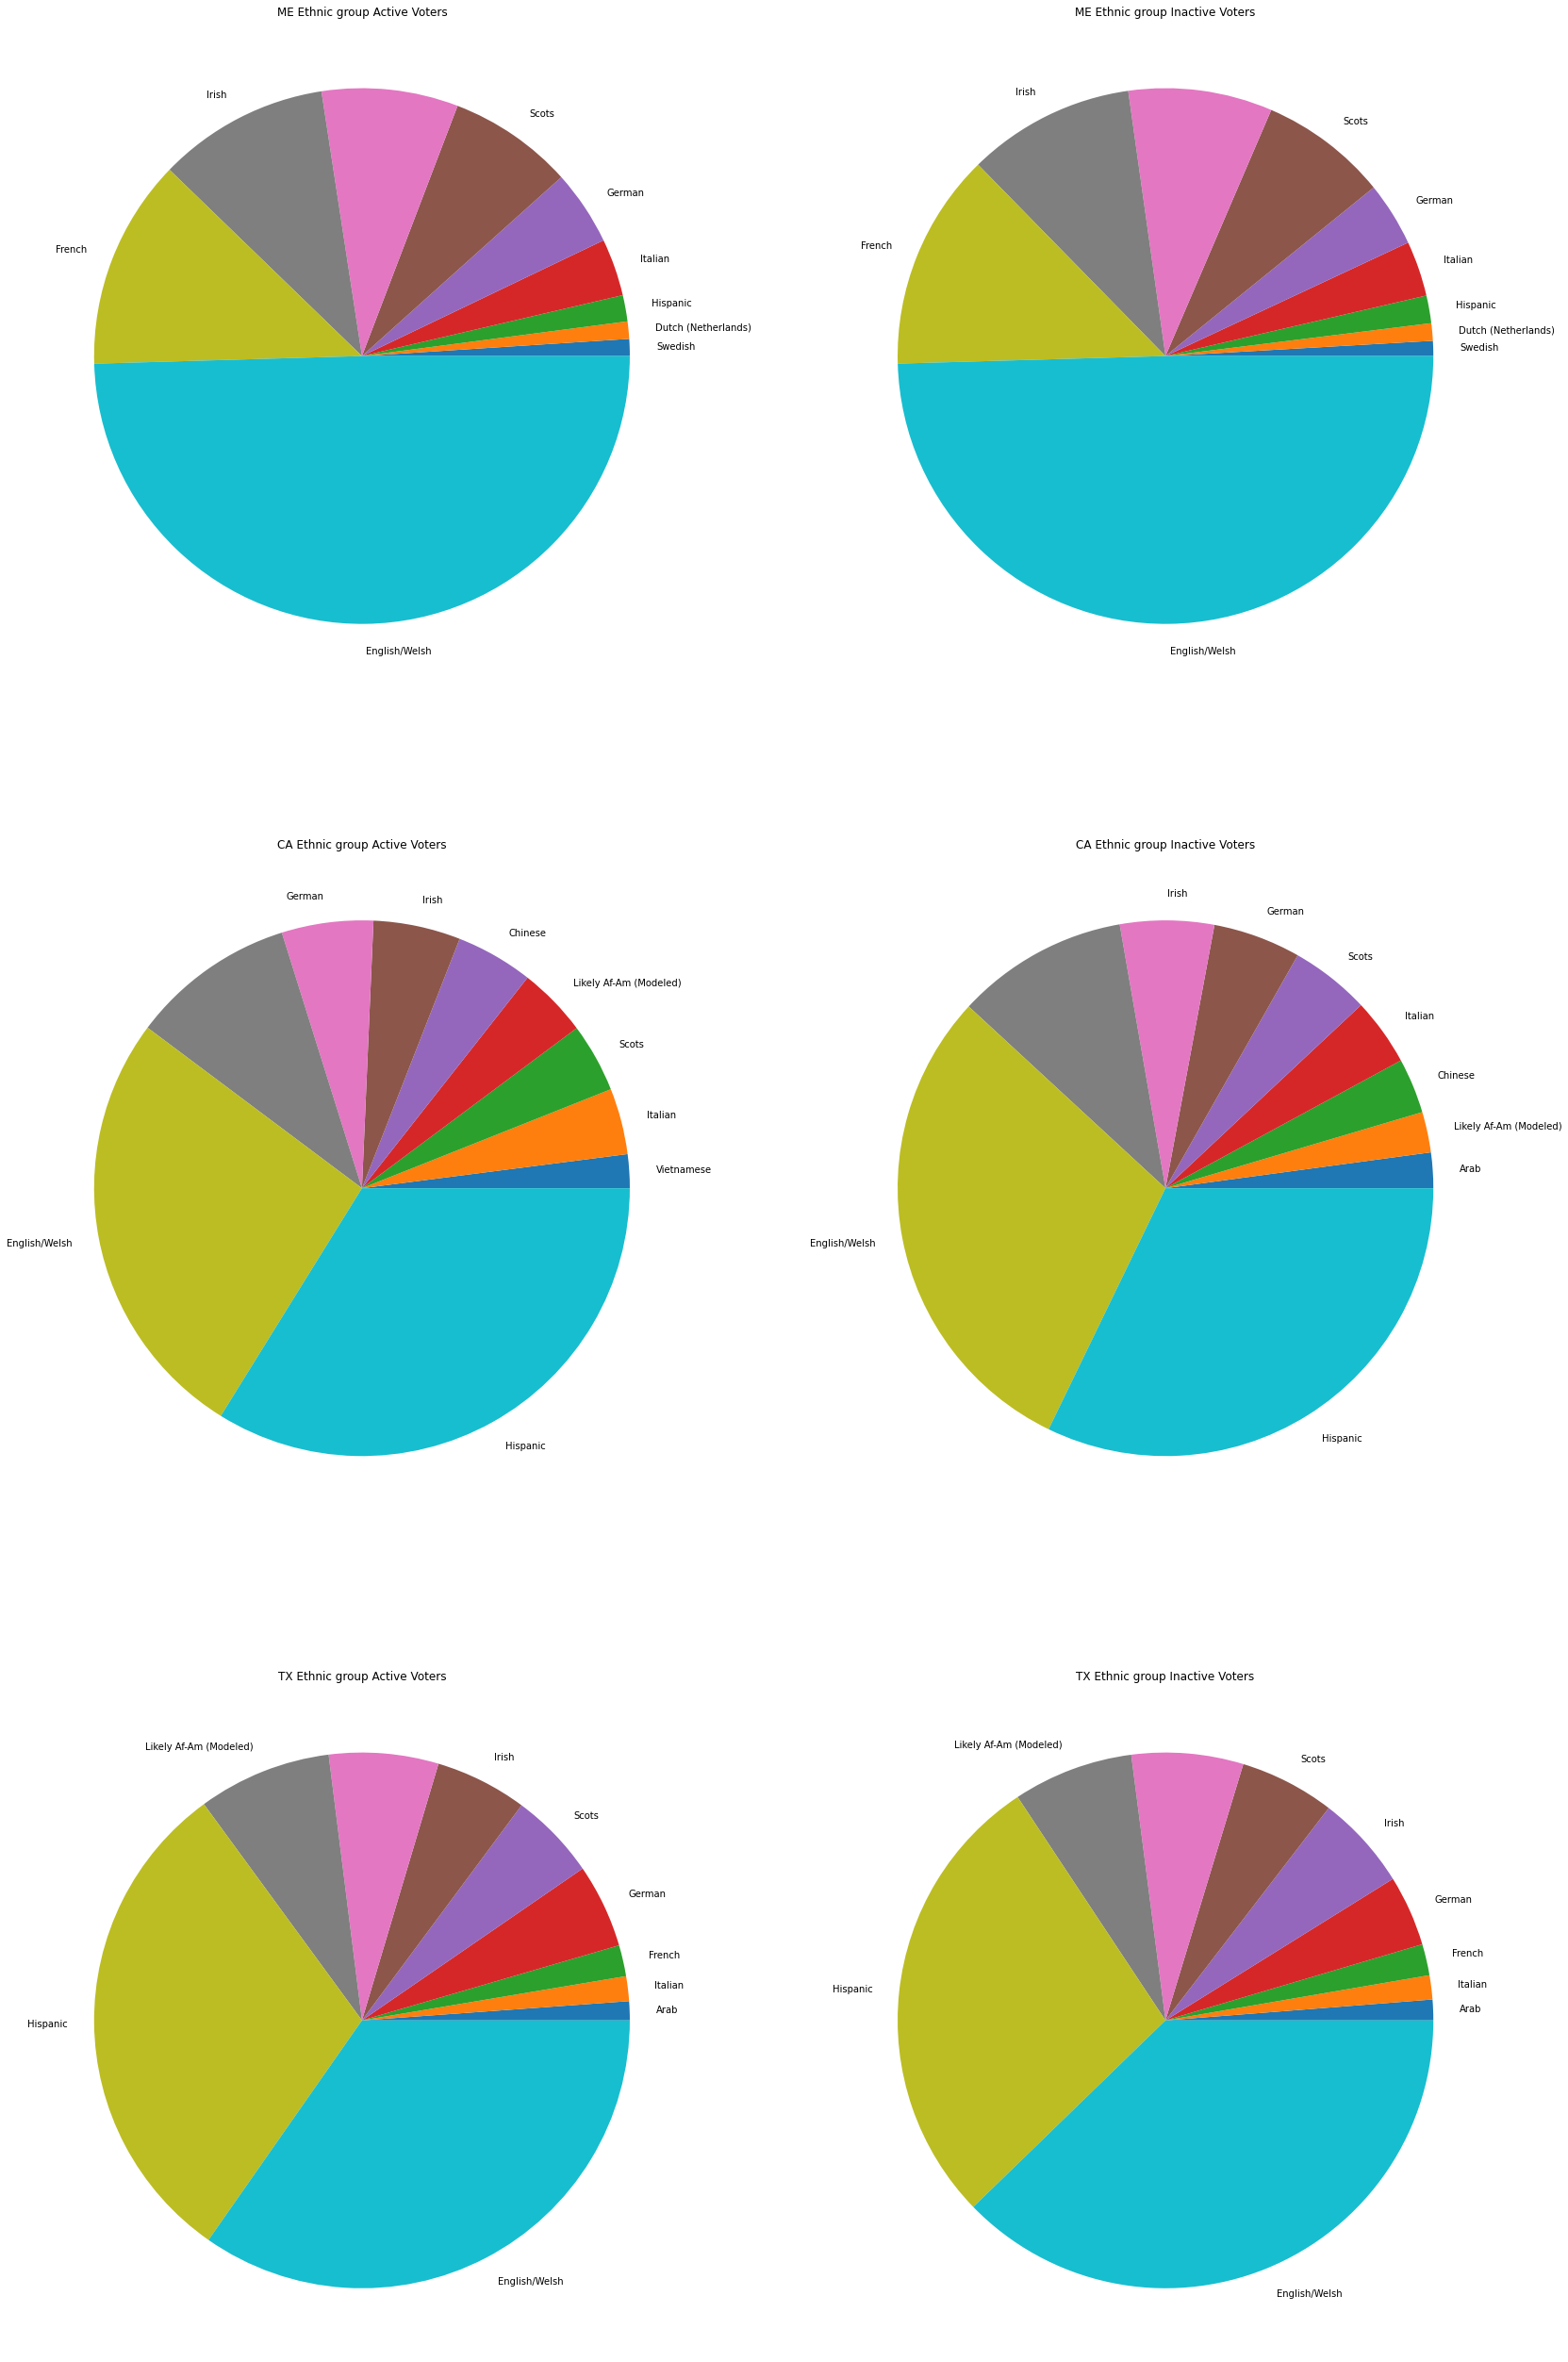

In [10]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(3,2, figsize = (28,46))
ax[0,0].pie(ame_Ethnic_['count'], labels = ame_Ethnic_['Ethnic_Description'])
ax[0,0].set_title('ME Ethnic group Active Voters')
ax[0,1].pie(ime_Ethnic_['count'], labels = ime_Ethnic_['Ethnic_Description'])
ax[0,1].set_title('ME Ethnic group Inactive Voters')
ax[1,0].pie(aca_Ethnic_['count'], labels = aca_Ethnic_['Ethnic_Description'])
ax[1,0].set_title('CA Ethnic group Active Voters')
ax[1,1].pie(ica_Ethnic_['count'], labels = ica_Ethnic_['Ethnic_Description'])
ax[1,1].set_title('CA Ethnic group Inactive Voters')
ax[2,0].pie(atx_Ethnic_['count'], labels = atx_Ethnic_['Ethnic_Description'])
ax[2,0].set_title('TX Ethnic group Active Voters')
ax[2,1].pie(itx_Ethnic_['count'], labels = itx_Ethnic_['Ethnic_Description'])
ax[2,1].set_title('TX Ethnic group Inactive Voters')

plt.show()

<font size = "4"> Some ratios are really close, so we also checked pandas dataframes to see the numbers. We found that the ethic groups' ratios don't change much. 

<font size = "4"> There are only 4% of ethnic members in any ethnic groups are inactive voter

In [26]:
ME_df.filter(ME_df.Voters_Active=="I").filter("Ethnic_Description IS NOT NULL").count()/ME_df.filter("Ethnic_Description IS NOT NULL").count()*100

4.045437384889108

<font size = "4"> Similar to "Ethnic_Description", there are only 3% of row which have any language description is inactive voter

In [43]:
ME_df.filter(ME_df.Voters_Active=="I").filter("Languages_Description IS NOT NULL").count()/ME_df.filter("Languages_Description IS NOT NULL").count()*100

3.119293140169967

In [11]:
ME_df.groupBy("Languages_Description").count().sort(desc("count")).show()

+---------------------+------+
|Languages_Description| count|
+---------------------+------+
|                 null|566242|
|              English|469628|
|              Spanish|  1025|
|               French|   479|
|              Italian|   404|
|           Vietnamese|   278|
|               German|   277|
|              Chinese|   217|
|           Portuguese|   183|
|               Arabic|   180|
|               Polish|   154|
|                Hindi|   135|
|               Korean|   128|
|              Russian|   126|
|              Swedish|   118|
|            Hungarian|    83|
|               Hebrew|    79|
|               Danish|    76|
|                Greek|    73|
|                Dutch|    53|
+---------------------+------+
only showing top 20 rows



### <font size = "4"><b> Parties</b></font>
    
<font size = "4"> For our parties variable, we found that the population in our dataset consists mostly democrates, non-partisans, and republicans. Other parties like green, libertarians, and other only account for a small percentage of our dataset. Since these are active voters, we won't compare them with inactive group, but we can investigate how demographic features relate to voter's party, and we would <b>exclude<b></font><font size = "4"> this attribute from ML part.

In [160]:
#parties
ME_Parties=ME_df.groupby("Parties_Description").count().limit(10).sort(("count")).toPandas()
CA_Parties=CA_df.groupby("Parties_Description").count().limit(10).sort(("count")).toPandas()
TX_Parties=TX_df.groupby("Parties_Description").count().limit(10).sort(("count")).toPandas()

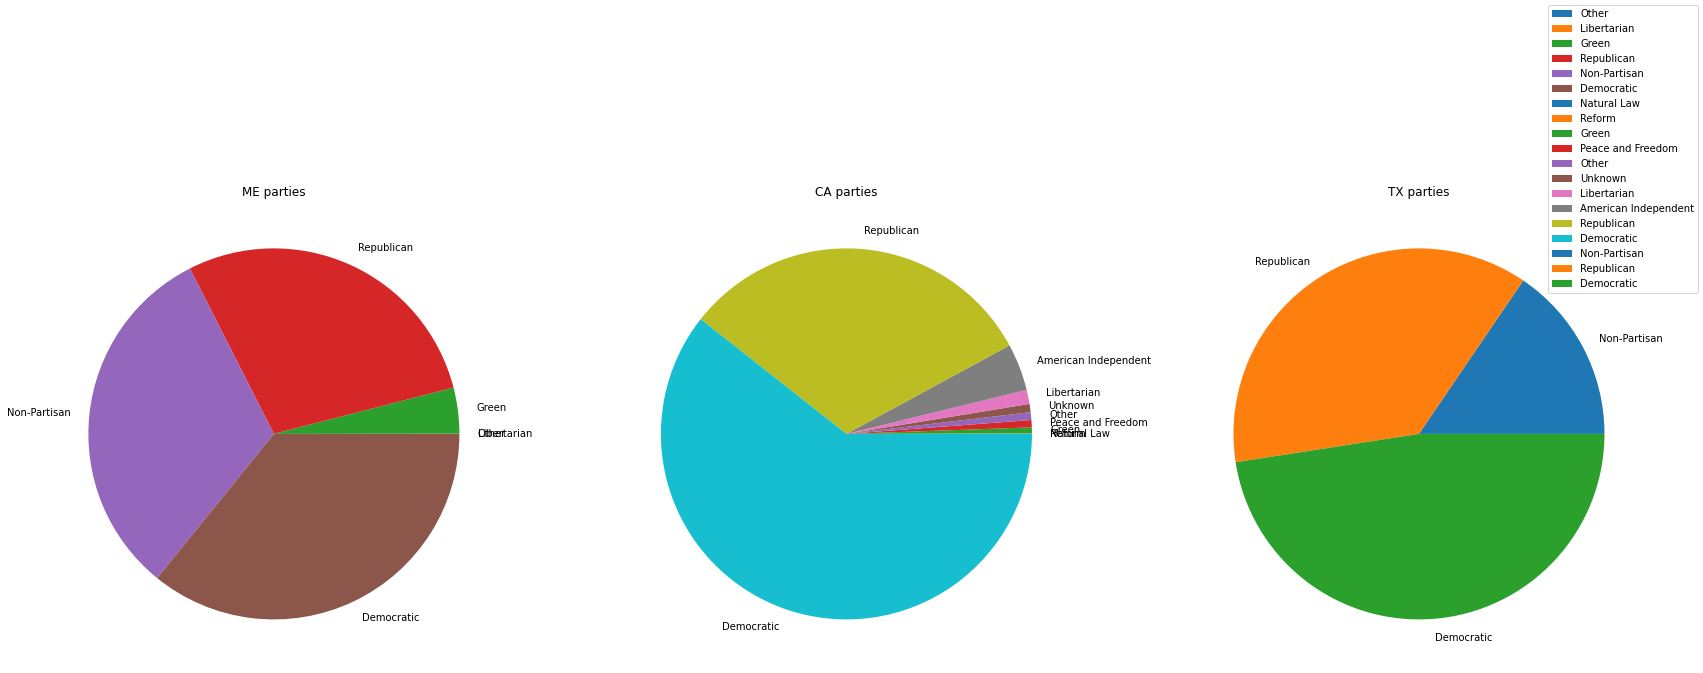

In [195]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,3, figsize = (24,12))
ax[0].pie(ME_Parties['count'], labels = ME_Parties["Parties_Description"])
ax[0].set_title('ME parties')
ax[1].pie(CA_Parties['count'], labels = CA_Parties["Parties_Description"])
ax[1].set_title('CA parties')
ax[2].pie(TX_Parties['count'], labels = TX_Parties["Parties_Description"])
ax[2].set_title('TX parties')
fig.tight_layout(pad=3.0)
fig.legend()
plt.show()

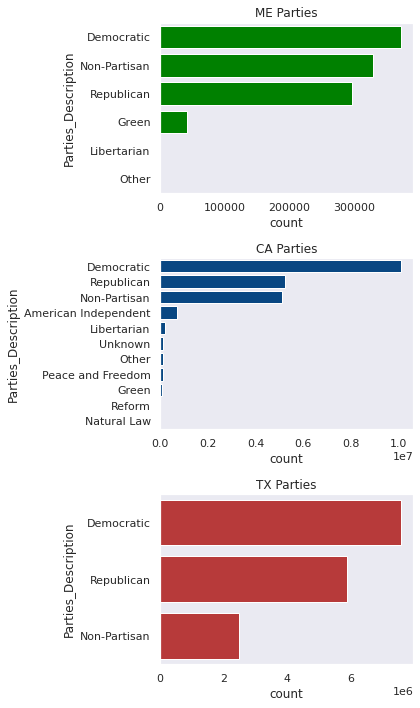

In [57]:
fig, ax = plt.subplots(3,1, figsize = (6,10))
sns.set_theme(style= 'dark')
sns.set_palette('bright')
sns.countplot(ax = ax[0],data=ME_Parties , y="Parties_Description", color = 'Green', saturation= 1.5, order = ME_Parties["Parties_Description"].value_counts().index)
ax[0].set_title('ME Parties')

sns.countplot(ax = ax[1], data=CA_Parties , y="Parties_Description", color = '#094782',saturation= 1.5, order = CA_Parties["Parties_Description"].value_counts().index)
ax[1].set_title('CA Parties')

sns.countplot(ax = ax[2],data=TX_Parties , y="Parties_Description", color = '#B73A3A', saturation= 1.5, order = TX_Parties["Parties_Description"].value_counts().index)
ax[2].set_title('TX Parties')
fig.tight_layout()
plt.show()

### <font size = "4"><b>Marital Status</b></font>
    
<font size = "4"> During our investigation of marital status, we found the data didn't actually distinguish single from married, but categorize people as "married", and "non-traditional". After plotting, though it shows most active voters are married, but as it lacks data of inactive voters, we believe this part is not that informative so eventually we decide stopping digging into this variable.
    
<font size = "4"> Overall, there are more people who are non-traditional type in CA than other two states.

In [18]:
ME_df.groupBy("MaritalStatus_Description").count().sort(desc("count")).show()

+-------------------------+------+
|MaritalStatus_Description| count|
+-------------------------+------+
|                     null|578676|
|                  Married|365574|
|          Non-Traditional| 96202|
+-------------------------+------+



In [42]:
from pyspark.sql.functions import desc
Marital_VoterGroup=ME_df.groupBy('MaritalStatus_Description','Voters_Active').count().sort(desc("count")).limit(10).sort(("count"))
Marital_VoterGroup.show()

+-------------------------+-------------+------+
|MaritalStatus_Description|Voters_Active| count|
+-------------------------+-------------+------+
|          Non-Traditional|            I|  4093|
|                  Married|            I|  7651|
|                     null|            I| 30553|
|          Non-Traditional|            A| 92109|
|                  Married|            A|357923|
|                     null|            A|548123|
+-------------------------+-------------+------+



In [8]:
print(ME_df.filter(ME_df.MaritalStatus_Description=="Married").count()/ME_df.filter("MaritalStatus_Description IS NOT NULL").count()*100)
print(CA_df.filter(CA_df.MaritalStatus_Description=="Married").count()/CA_df.filter("MaritalStatus_Description IS NOT NULL").count()*100)
print(TX_df.filter(TX_df.MaritalStatus_Description=="Married").count()/TX_df.filter("MaritalStatus_Description IS NOT NULL").count()*100)

79.16695540695056


72.5435858274721


81.93726573524691


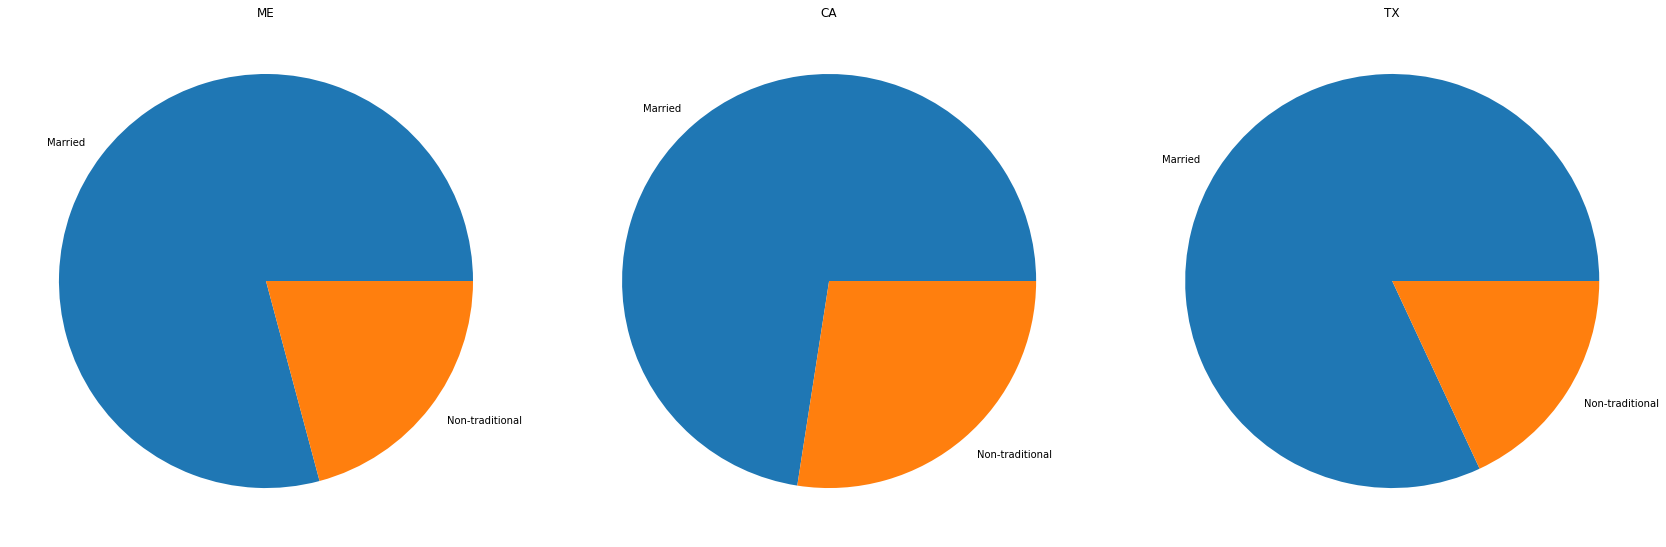

In [19]:
ME_df.filter(ME_df.Voters_Gender=="M").count()/ME_df.filter("Voters_Gender IS NOT NULL").count()*100
CA_df.filter(CA_df.Voters_Gender=="M").count()/CA_df.filter("Voters_Gender IS NOT NULL").count()*100
TX_df.filter(TX_df.Voters_Gender=="M").count()/TX_df.filter("Voters_Gender IS NOT NULL").count()*100
ME_df.filter(ME_df.MaritalStatus_Description=="Married").count()/ME_df.filter("MaritalStatus_Description IS NOT NULL").count()*100
CA_df.filter(CA_df.MaritalStatus_Description=="Married").count()/CA_df.filter("MaritalStatus_Description IS NOT NULL").count()*100
TX_df.filter(TX_df.MaritalStatus_Description=="Married").count()/TX_df.filter("MaritalStatus_Description IS NOT NULL").count()*100
fig, ax = plt.subplots(1,3, figsize = (24,12))
ax[0].pie([79.16695540695056,100-79.16695540695056], labels = ['Married','Non-traditional'])
ax[0].set_title('ME')
ax[1].pie([72.5435858274721,100-72.5435858274721], labels = ['Married','Non-traditional'])
ax[1].set_title('CA')
ax[2].pie([81.93726573524691,100-81.93726573524691], labels = ['Married','Non-traditional'])
ax[2].set_title('TX')
fig.tight_layout(pad=3.0)
plt.show()

### <font size = "4"><b>Income and Education</b></font>
    
<font size = "4"> For this part, we investigate on income and education. The question is whether a person's education and income level would affect his/her willingness to vote. We found similar trend of income versus number of active voters in three states.

<font size = "4"> We count each level of income, then we calculate the percentage, and then show the distributions using bar plot. Since we have much less data of inactive voters, the data of active voters are more informative. We found the distribution of the active voters are more balanced.
    
<font size = "4"> We also found higher education level generally relates to more active voters. This is consistent for three states.

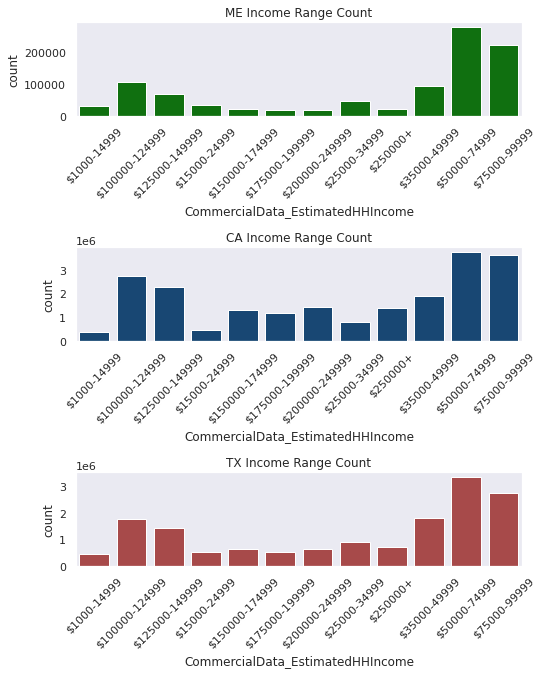

In [9]:
# Income Amount (Range)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

ME_income_range =ME_df.groupby("CommercialData_EstimatedHHIncome").count().sort(("CommercialData_EstimatedHHIncome")).toPandas()
ME_income_range = ME_income_range.set_index('CommercialData_EstimatedHHIncome')

CA_income_range =CA_df.groupby("CommercialData_EstimatedHHIncome").count().sort(("CommercialData_EstimatedHHIncome")).toPandas()
CA_income_range = CA_income_range.set_index('CommercialData_EstimatedHHIncome')

TX_income_range =TX_df.groupby("CommercialData_EstimatedHHIncome").count().sort(("CommercialData_EstimatedHHIncome")).toPandas()
TX_income_range = TX_income_range.set_index('CommercialData_EstimatedHHIncome')

fig, ax = plt.subplots(3,1, figsize = (8,10))
ME_income_range_graph = sns.barplot(ax=ax[0],data = ME_income_range, x =ME_income_range.index, y=ME_income_range['count'], color = 'Green')
ME_income_range_graph.set_xticklabels(ME_income_range_graph.get_xticklabels(), rotation=45)
ax[0].set_title('ME Income Range Count')


CA_income_range_graph = sns.barplot(ax=ax[1],data = CA_income_range, x =CA_income_range.index, y=CA_income_range['count'], color = '#094782')
CA_income_range_graph.set_xticklabels(CA_income_range_graph.get_xticklabels(), rotation=45)
ax[1].set_title('CA Income Range Count')

TX_income_range_graph = sns.barplot(ax=ax[2],data = TX_income_range, x =TX_income_range.index, y=TX_income_range['count'], color = '#B73A3A')
TX_income_range_graph.set_xticklabels(TX_income_range_graph.get_xticklabels(), rotation=45)
ax[2].set_title('TX Income Range Count')

plt.subplots_adjust(hspace = 1.4)
plt.show()

<font size = "4">The following table shows the different education level, and the correspond count number.

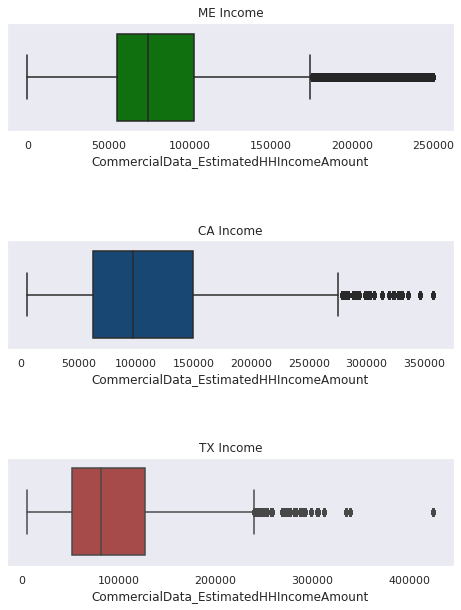

In [15]:
# turn ME_df to double type 
ME_df = ME_df.withColumn('CommercialData_EstimatedHHIncomeAmount', f.regexp_replace('CommercialData_EstimatedHHIncomeAmount', '[$,]', '').cast('double'))
CA_df = CA_df.withColumn('CommercialData_EstimatedHHIncomeAmount', f.regexp_replace('CommercialData_EstimatedHHIncomeAmount', '[$,]', '').cast('double'))
TX_df = TX_df.withColumn('CommercialData_EstimatedHHIncomeAmount', f.regexp_replace('CommercialData_EstimatedHHIncomeAmount', '[$,]', '').cast('double'))
import seaborn as sns
import pandas as pd 
import matplotlib.pyplot as plt

fig, ax = plt.subplots(3,1, figsize = (8,10))

ME_df1 = ME_df.select('CommercialData_EstimatedHHIncomeAmount').toPandas()
ME_box = sns.boxplot(ax=ax[0], x=ME_df1["CommercialData_EstimatedHHIncomeAmount"], color = 'Green')
ax[0].set_title('ME Income')

CA_df1 = CA_df.select('CommercialData_EstimatedHHIncomeAmount').toPandas()
CA_box = sns.boxplot(ax=ax[1],x=CA_df1["CommercialData_EstimatedHHIncomeAmount"], color = '#094782')
ax[1].set_title('CA Income')

TX_df1 = TX_df.select('CommercialData_EstimatedHHIncomeAmount').toPandas()
TX_box = sns.boxplot(ax=ax[2], x=TX_df1["CommercialData_EstimatedHHIncomeAmount"], color = '#B73A3A')
ax[2].set_title('TX Income')

plt.subplots_adjust(hspace = 1.0)
plt.show()

<font size = "4">From the pie charts below, we can clearly see that the education of active and inactive voters are different in three states. There are more people go to college in active voters group. This does not neccessarily mean that lower education level causes less willing to vote. As the previouse part shows, inactive voters are generally younger. Such phenomenon can also explains the difference.

In [8]:
from pyspark.sql.functions import desc,col
caAIedu=CA_df.groupBy('Voters_Active','CommercialData_Education').count()
caAIedu=caAIedu.na.drop()
caAedu = caAIedu.filter(caAIedu.Voters_Active == 'A')
caIedu = caAIedu.filter(caAIedu.Voters_Active == 'I')
meAIedu=ME_df.groupBy('Voters_Active','CommercialData_Education').count()
meAIedu=meAIedu.na.drop()
meAedu = meAIedu.filter(meAIedu.Voters_Active == 'A')
meIedu = meAIedu.filter(meAIedu.Voters_Active == 'I')
txAIedu=TX_df.groupBy('Voters_Active','CommercialData_Education').count()
txAIedu=txAIedu.na.drop()
txAedu = txAIedu.filter(txAIedu.Voters_Active == 'A')
txIedu = txAIedu.filter(txAIedu.Voters_Active == 'I')

#ca
df_caIedu = caIedu.toPandas()
df_caIedu['count'] = df_caIedu['count'].astype(float)
df_caIedu['percentage'] = df_caIedu['count']/df_caIedu['count'].sum()

df_caAedu = txAedu.toPandas()
df_caAedu['count'] = df_caIedu['count'].astype(float)
df_caAedu['percentage'] = df_caIedu['count']/df_caAedu['count'].sum()

#tx
df_txIedu = meIedu.toPandas()
df_txIedu['count'] = df_txIedu['count'].astype(float)
df_txIedu['percentage'] = df_txIedu['count']/df_txIedu['count'].sum()

df_txAedu = txAedu.toPandas()
df_txAedu['count'] = df_txIedu['count'].astype(float)
df_txAedu['percentage'] = df_txIedu['count']/df_txAedu['count'].sum()

#me
df_meIedu = meIedu.toPandas()
df_meIedu['count'] = df_meIedu['count'].astype(float)
df_meIedu['percentage'] = df_meIedu['count']/df_meIedu['count'].sum()

df_meAedu = txAedu.toPandas()
df_meAedu['count'] = df_meIedu['count'].astype(float)
df_meAedu['percentage'] = df_meIedu['count']/df_meAedu['count'].sum()




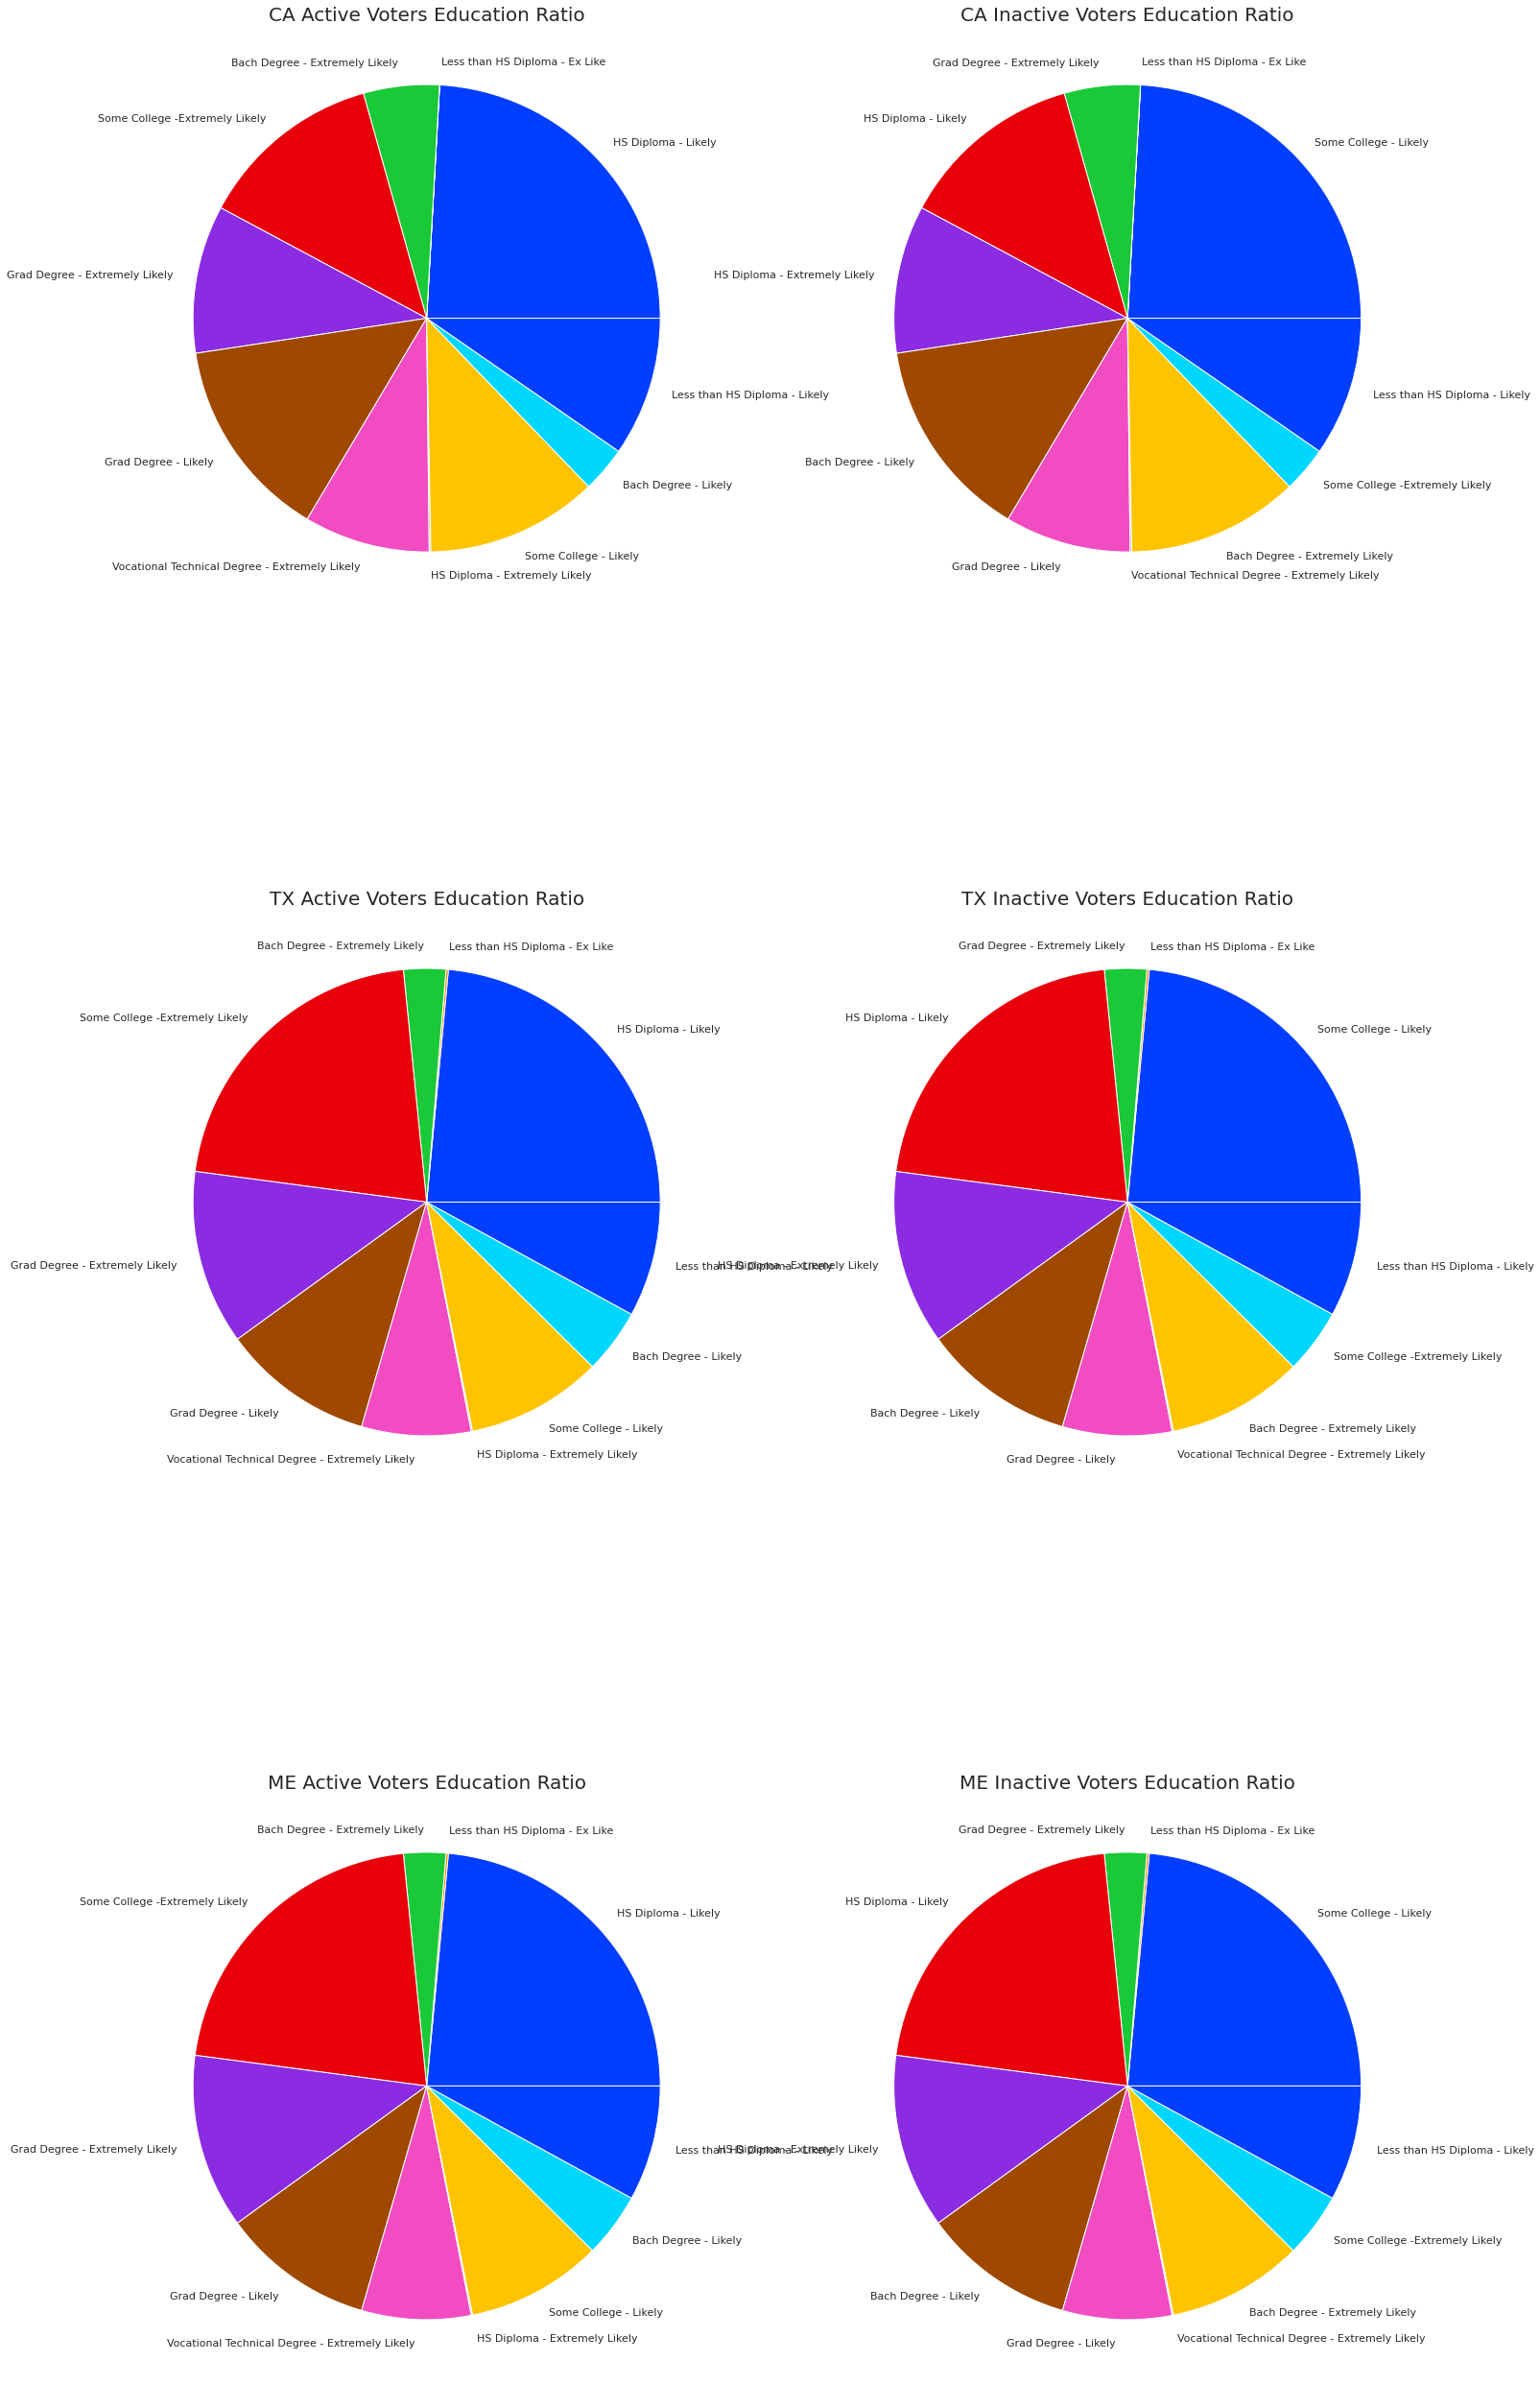

In [9]:
fig, ax = plt.subplots(3,2, figsize = (24,48))
ax[0,0].pie(df_caAedu.percentage, labels = df_caAedu.CommercialData_Education)
ax[0,0].set_title('CA Active Voters Education Ratio',fontsize=20)
ax[0,1].pie(df_caIedu.percentage, labels = df_caIedu.CommercialData_Education)
ax[0,1].set_title('CA Inactive Voters Education Ratio', fontsize = 20)

ax[1,0].pie(df_txAedu.percentage, labels = df_txAedu.CommercialData_Education)
ax[1,0].set_title('TX Active Voters Education Ratio',fontsize=20)
ax[1,1].pie(df_txIedu.percentage, labels = df_txIedu.CommercialData_Education)
ax[1,1].set_title('TX Inactive Voters Education Ratio', fontsize = 20)

ax[2,0].pie(df_meAedu.percentage, labels = df_meAedu.CommercialData_Education)
ax[2,0].set_title('ME Active Voters Education Ratio',fontsize=20)
ax[2,1].pie(df_meIedu.percentage, labels = df_meIedu.CommercialData_Education)
ax[2,1].set_title('ME Inactive Voters Education Ratio', fontsize = 20)

plt.show()

### <font size = "4"><b>ISPSA</b></font>
    
<font size = "4"> The question is, whether a person with higher societal position who be more willing to vote. ISPSA indicating a person's social position in a small area, which to some extant shows a person social status. Index of Social Position for Small Areas" is a mix of education and income information to suggest where a voter lies on a scale of 0 to 9 on the "social-economic ladder". Generally, we found there are more people who are at higher "social-economic ladder" are active voters. This relation is consistent in three states.

<font size = "4"> We can see a clear trend from below that with the increase of ISPSA, the percentage of active voters also increase. Such trend is consistent with three state. What's special with CA is, such trend is not very strong in CA.

In [10]:
#ISPAS
import numpy as np
ME_ISPSA=ME_df.groupby("CommercialData_ISPSA").count().sort(("CommercialData_ISPSA")).toPandas()
ME_ISPSA = ME_ISPSA.set_index('CommercialData_ISPSA')
ME_ISPSA.drop(index=(np.nan),inplace = True)

CA_ISPSA=CA_df.groupby("CommercialData_ISPSA").count().sort(("CommercialData_ISPSA")).toPandas()
CA_ISPSA = CA_ISPSA.set_index('CommercialData_ISPSA')
CA_ISPSA.drop(index=(np.nan),inplace = True)

TX_ISPSA=TX_df.groupby("CommercialData_ISPSA").count().sort(("CommercialData_ISPSA")).toPandas()
TX_ISPSA = TX_ISPSA.set_index('CommercialData_ISPSA')
TX_ISPSA.drop(index=(np.nan), inplace = True)

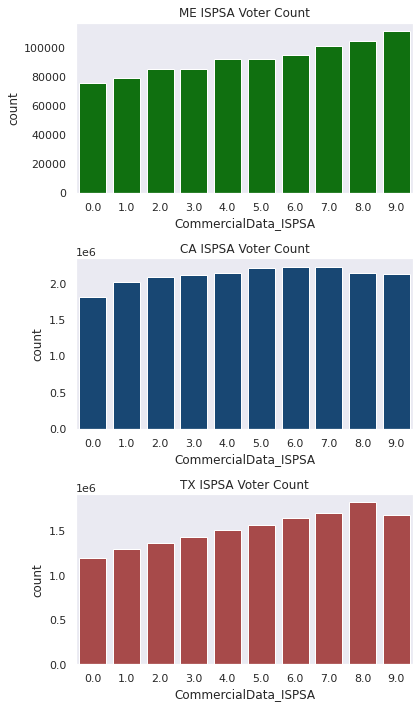

In [12]:
fig, ax = plt.subplots(3,1, figsize = (6,10))
sns.barplot(ax=ax[0],data = ME_ISPSA, x =ME_ISPSA.index, y=ME_ISPSA['count'], color = 'Green')
ax[0].set_title('ME ISPSA Voter Count')
sns.barplot(ax=ax[1],data = CA_ISPSA, x =CA_ISPSA.index, y=CA_ISPSA['count'], color = '#094782')
ax[1].set_title('CA ISPSA Voter Count')
sns.barplot(ax=ax[2],data = TX_ISPSA, x =TX_ISPSA.index, y=TX_ISPSA['count'], color = '#B73A3A')
ax[2].set_title('TX ISPSA Voter Count')
fig.tight_layout()
plt.show()

In [20]:
ME_ISPSA=ME_df.groupby('Voters_Active',"CommercialData_ISPSA").count().sort(("CommercialData_ISPSA")).toPandas()
ME_ISPSA.drop(index = 0,inplace = True)
ME_ISPSA.drop(index = 1,inplace = True)
CA_ISPSA=CA_df.groupby('Voters_Active',"CommercialData_ISPSA").count().sort(("CommercialData_ISPSA")).toPandas()
CA_ISPSA.drop(index = 0,inplace = True)
CA_ISPSA.drop(index = 1,inplace = True)
TX_ISPSA=TX_df.groupby('Voters_Active',"CommercialData_ISPSA").count().sort(("CommercialData_ISPSA")).toPandas()
TX_ISPSA.drop(index = 0,inplace = True)
TX_ISPSA.drop(index = 1,inplace = True)
ME_ISPSA

,Voters_Active,CommercialData_ISPSA,count
2,A,0.0,71298
3,I,0.0,4162
4,A,1.0,74942
5,I,1.0,3657
6,A,2.0,81111
7,I,2.0,3744
8,I,3.0,3976
9,A,3.0,81282
10,I,4.0,4066
11,A,4.0,88149


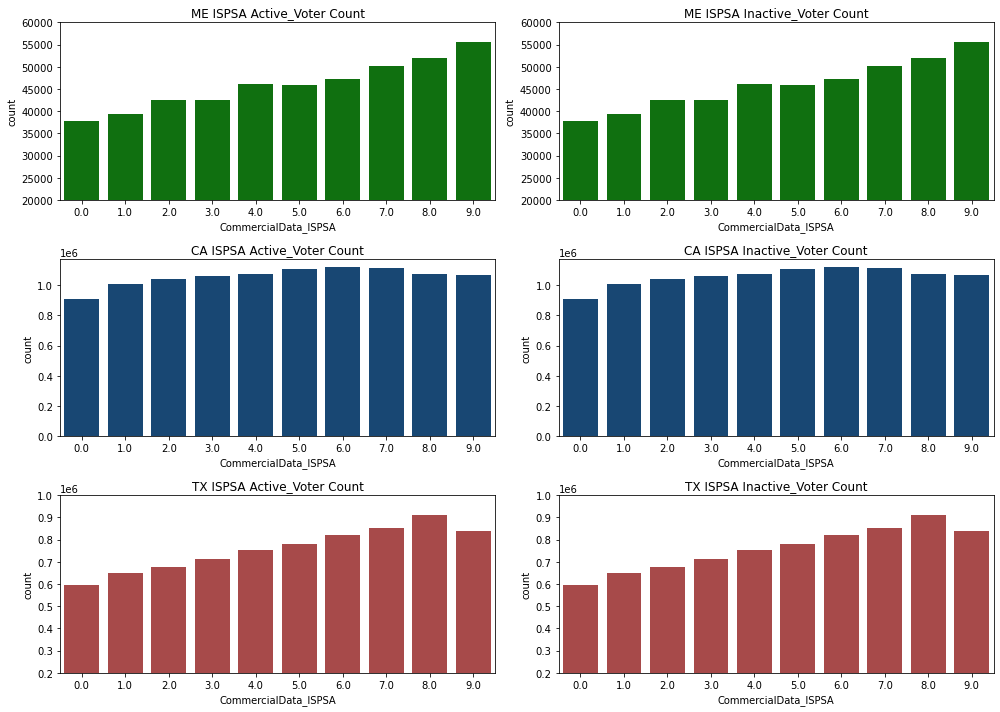

In [37]:
fig, ax = plt.subplots(3,2, figsize = (14,10))
sns.barplot(ax=ax[0,0],data = ME_ISPSA[ ME_ISPSA['Voters_Active'] == 'A'], x =ME_ISPSA['CommercialData_ISPSA'], y=ME_ISPSA['count'], color = 'Green', ci = False)
ax[0,0].set_ylim([20000, 60000])
ax[0,0].set_title('ME ISPSA Active_Voter Count')
sns.barplot(ax=ax[0,1],data = ME_ISPSA[ ME_ISPSA['Voters_Active'] == 'I'], x =ME_ISPSA['CommercialData_ISPSA'], y=ME_ISPSA['count'], color = 'Green', ci = False)
ax[0,1].set_ylim([20000, 60000])
ax[0,1].set_title('ME ISPSA Inactive_Voter Count')
sns.barplot(ax=ax[1,0],data = CA_ISPSA[ CA_ISPSA['Voters_Active'] == 'A'], x =CA_ISPSA['CommercialData_ISPSA'], y=CA_ISPSA['count'], color = '#094782', ci = False)

ax[1,0].set_title('CA ISPSA Active_Voter Count')
sns.barplot(ax=ax[1,1],data = CA_ISPSA[ CA_ISPSA['Voters_Active'] == 'I'], x =CA_ISPSA['CommercialData_ISPSA'], y=CA_ISPSA['count'], color = '#094782', ci = False)

ax[1,1].set_title('CA ISPSA Inactive_Voter Count')
sns.barplot(ax=ax[2,0],data = TX_ISPSA[ TX_ISPSA['Voters_Active'] == 'A'], x =TX_ISPSA['CommercialData_ISPSA'], y=TX_ISPSA['count'], color = '#B73A3A', ci = False)
ax[2,0].set_ylim([200000, 1000000])
ax[2,0].set_title('TX ISPSA Active_Voter Count')
sns.barplot(ax=ax[2,1],data = TX_ISPSA[ TX_ISPSA['Voters_Active'] == 'I'], x =TX_ISPSA['CommercialData_ISPSA'], y=TX_ISPSA['count'], color = '#B73A3A', ci = False)
ax[2,1].set_ylim([200000, 1000000])
ax[2,1].set_title('TX ISPSA Inactive_Voter Count')
fig.tight_layout()
plt.show()

### <font size = "4"><b>Child</b></font> 
    
<font size = "4">For this part, we study on with child vs. without child. The question is whether areas with more families with children have more voters? We found that areas that  more couples with child seemming have higher voting rate, but it can relate age, therefore we can not say the phenomenon shows a causal relationship.

In [74]:
MEndf = ME_df.withColumn('CommercialData_AreaPcntHHMarriedCoupleNoChild', regexp_replace('CommercialData_AreaPcntHHMarriedCoupleNoChild', '%', ''))
MEndf=MEndf.withColumn("CommercialData_AreaPcntHHMarriedCoupleNoChild",col("CommercialData_AreaPcntHHMarriedCoupleNoChild").cast("int"))
MEndf2=MEndf.groupby("CommercialData_AreaPcntHHMarriedCoupleNoChild").count().sort(("CommercialData_AreaPcntHHMarriedCoupleNoChild"))
MEn22=MEndf2.na.drop().toPandas()

#I remove the % sign and change the type of column so that it can be sorted correctly
MEwdf = ME_df.withColumn('CommercialData_AreaPcntHHMarriedCoupleWithChild', regexp_replace('CommercialData_AreaPcntHHMarriedCoupleWithChild', '%', ''))
MEwdf=MEwdf.withColumn("CommercialData_AreaPcntHHMarriedCoupleWithChild",col("CommercialData_AreaPcntHHMarriedCoupleWithChild").cast("int"))
MEwdf2=MEwdf.groupby("CommercialData_AreaPcntHHMarriedCoupleWithChild").count().sort(("CommercialData_AreaPcntHHMarriedCoupleWithChild"))
MEw22=MEwdf2.na.drop().toPandas()

ME_w_df= MEw22.set_index('CommercialData_AreaPcntHHMarriedCoupleWithChild')
ME_n_df = MEn22.set_index('CommercialData_AreaPcntHHMarriedCoupleNoChild')

CAndf = CA_df.withColumn('CommercialData_AreaPcntHHMarriedCoupleNoChild', regexp_replace('CommercialData_AreaPcntHHMarriedCoupleNoChild', '%', ''))
CAndf=CAndf.withColumn("CommercialData_AreaPcntHHMarriedCoupleNoChild",col("CommercialData_AreaPcntHHMarriedCoupleNoChild").cast("int"))
CAndf2=CAndf.groupby("CommercialData_AreaPcntHHMarriedCoupleNoChild").count().sort(("CommercialData_AreaPcntHHMarriedCoupleNoChild"))
CAn22=CAndf2.na.drop().toPandas()

#I remove the % sign and change the type of column so that it can be sorted correctly
CAwdf = CA_df.withColumn('CommercialData_AreaPcntHHMarriedCoupleWithChild', regexp_replace('CommercialData_AreaPcntHHMarriedCoupleWithChild', '%', ''))
CAwdf=CAwdf.withColumn("CommercialData_AreaPcntHHMarriedCoupleWithChild",col("CommercialData_AreaPcntHHMarriedCoupleWithChild").cast("int"))
CAwdf2=CAwdf.groupby("CommercialData_AreaPcntHHMarriedCoupleWithChild").count().sort(("CommercialData_AreaPcntHHMarriedCoupleWithChild"))
CAw22=CAwdf2.na.drop().toPandas()

CA_w_df= CAw22.set_index('CommercialData_AreaPcntHHMarriedCoupleWithChild')
CA_n_df = CAn22.set_index('CommercialData_AreaPcntHHMarriedCoupleNoChild')

TXndf = TX_df.withColumn('CommercialData_AreaPcntHHMarriedCoupleNoChild', regexp_replace('CommercialData_AreaPcntHHMarriedCoupleNoChild', '%', ''))
TXndf=TXndf.withColumn("CommercialData_AreaPcntHHMarriedCoupleNoChild",col("CommercialData_AreaPcntHHMarriedCoupleNoChild").cast("int"))
TXndf2=TXndf.groupby("CommercialData_AreaPcntHHMarriedCoupleNoChild").count().sort(("CommercialData_AreaPcntHHMarriedCoupleNoChild"))
TXn22=TXndf2.na.drop().toPandas()

#I remove the % sign and change the type of column so that it can be sorted correctly
TXwdf = TX_df.withColumn('CommercialData_AreaPcntHHMarriedCoupleWithChild', regexp_replace('CommercialData_AreaPcntHHMarriedCoupleWithChild', '%', ''))
TXwdf=TXwdf.withColumn("CommercialData_AreaPcntHHMarriedCoupleWithChild",col("CommercialData_AreaPcntHHMarriedCoupleWithChild").cast("int"))
TXwdf2=TXwdf.groupby("CommercialData_AreaPcntHHMarriedCoupleWithChild").count().sort(("CommercialData_AreaPcntHHMarriedCoupleWithChild"))
TXw22=TXwdf2.na.drop().toPandas()

TX_w_df= TXw22.set_index('CommercialData_AreaPcntHHMarriedCoupleWithChild')
TX_n_df = TXn22.set_index('CommercialData_AreaPcntHHMarriedCoupleNoChild')

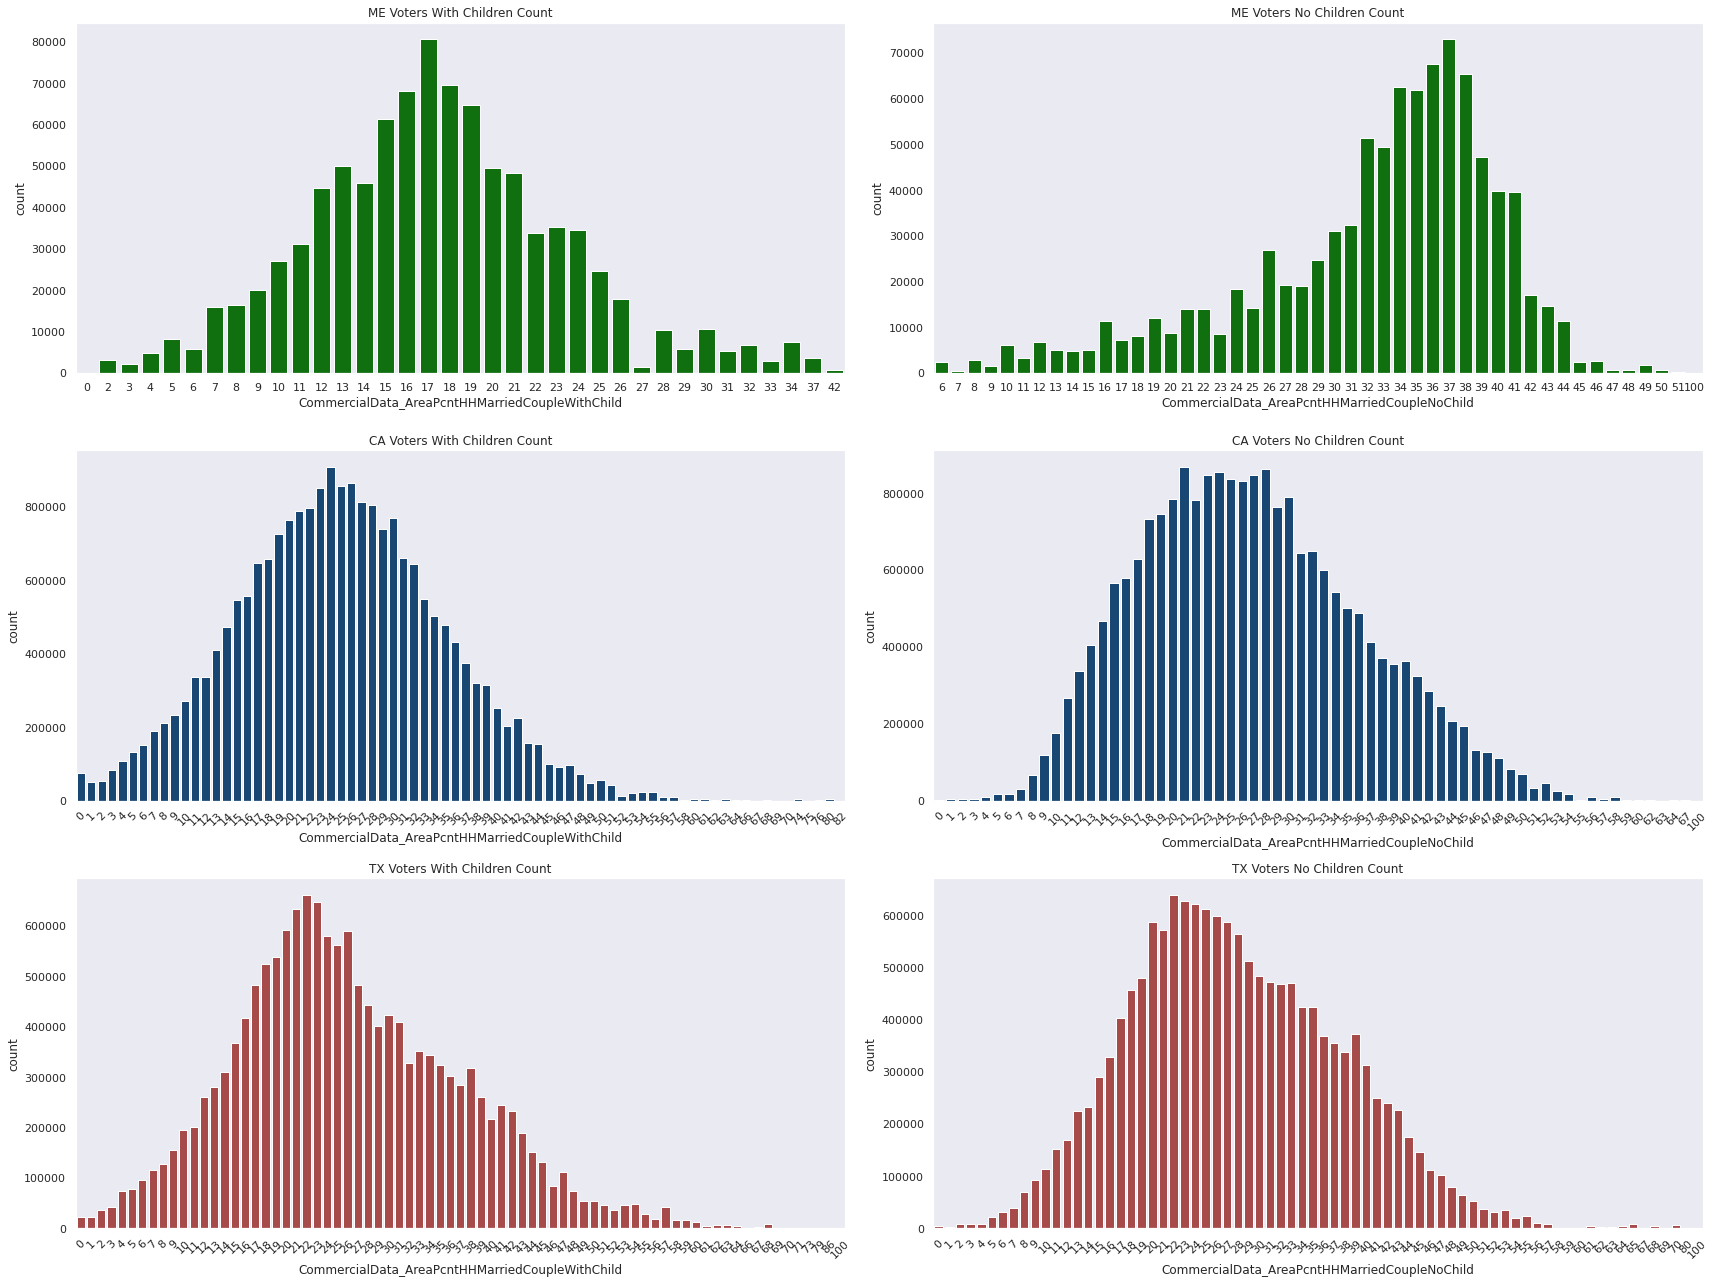

In [79]:
fig, ax = plt.subplots(3,2, figsize = (24,18))
sns.barplot(ax=ax[0,0],data = ME_w_df, x =ME_w_df.index, y='count', color = 'Green', ci = False)
ax[0,0].set_title('ME Voters With Children Count')
sns.barplot(ax=ax[0,1],data = ME_n_df, x =ME_n_df.index, y='count', color = 'Green', ci = False)
ax[0,1].set_title('ME Voters No Children Count')

cap1 = sns.barplot(ax=ax[1,0],data = CA_w_df, x =CA_w_df.index, y='count', color = '#094782', ci = False)
cap1.set_xticklabels(cap1.get_xticklabels(), rotation=45)
ax[1,0].set_title('CA Voters With Children Count')
cap2 = sns.barplot(ax=ax[1,1],data = CA_n_df, x =CA_n_df.index, y='count', color = '#094782', ci = False)
cap2.set_xticklabels(cap2.get_xticklabels(), rotation=45)
ax[1,1].set_title('CA Voters No Children Count')

txp1 = sns.barplot(ax=ax[2,0],data = TX_w_df, x =TX_w_df.index, y='count', color = '#B73A3A', ci = False)
txp1.set_xticklabels(txp1.get_xticklabels(), rotation=45)
ax[2,0].set_title('TX Voters With Children Count')
txp2 = sns.barplot(ax=ax[2,1],data = TX_n_df, x =TX_n_df.index, y='count', color = '#B73A3A', ci = False)
txp2.set_xticklabels(txp2.get_xticklabels(), rotation=45)
ax[2,1].set_title('TX Voters No Children Count')
fig.tight_layout()
plt.show()

In [66]:
NoChild=MEndf.groupBy("CommercialData_AreaPcntHHMarriedCoupleNoChild","Voters_Active").count()
NoChild=NoChild.na.drop()
NoChild = NoChild.groupBy("CommercialData_AreaPcntHHMarriedCoupleNoChild").pivot('Voters_Active').avg('count').sort(("CommercialData_AreaPcntHHMarriedCoupleNoChild"))
NoChild=NoChild.withColumn('Active percentage', col("A") / (col("A")+col("I")) * 100)
NoChild=NoChild.withColumn('Inactive percentage', col("I") / (col("A")+col("I")) * 100)
NoChild.show(5)

+---------------------------------------------+------+-----+-----------------+-------------------+
|CommercialData_AreaPcntHHMarriedCoupleNoChild|     A|    I|Active percentage|Inactive percentage|
+---------------------------------------------+------+-----+-----------------+-------------------+
|                                            6|2177.0|152.0|93.47359381708888|  6.526406182911121|
|                                            7| 320.0| 26.0|92.48554913294798|  7.514450867052023|
|                                            8|2516.0|229.0| 91.6575591985428|  8.342440801457194|
|                                            9|1549.0| 92.0|94.39366240097502|  5.606337599024984|
|                                           10|5736.0|415.0|93.25312957242726|  6.746870427572753|
+---------------------------------------------+------+-----+-----------------+-------------------+
only showing top 5 rows



In [70]:
NoChild=MEwdf.groupBy("CommercialData_AreaPcntHHMarriedCoupleWithChild","Voters_Active").count()
NoChild=NoChild.na.drop()
NoChild = NoChild.groupBy("CommercialData_AreaPcntHHMarriedCoupleWithChild").pivot('Voters_Active').avg('count').sort(("CommercialData_AreaPcntHHMarriedCoupleWithChild"))
NoChild=NoChild.withColumn('Active percentage', col("A") / (col("A")+col("I")) * 100)
NoChild=NoChild.withColumn('Inactive percentage', col("I") / (col("A")+col("I")) * 100)
NoChild.show(5)

+-----------------------------------------------+------+-----+-----------------+-------------------+
|CommercialData_AreaPcntHHMarriedCoupleWithChild|     A|    I|Active percentage|Inactive percentage|
+-----------------------------------------------+------+-----+-----------------+-------------------+
|                                              0|  44.0|  2.0|95.65217391304348| 4.3478260869565215|
|                                              2|2893.0|202.0|93.47334410339256|  6.526655896607432|
|                                              3|1947.0|146.0|93.02436693741042|  6.975633062589584|
|                                              4|4594.0|263.0|94.58513485690756|  5.414865143092444|
|                                              5|7705.0|459.0|94.37775600195982|  5.622243998040177|
+-----------------------------------------------+------+-----+-----------------+-------------------+
only showing top 5 rows



In [80]:
NoChild=CAndf.groupBy("CommercialData_AreaPcntHHMarriedCoupleNoChild","Voters_Active").count()
NoChild=NoChild.na.drop()
NoChild = NoChild.groupBy("CommercialData_AreaPcntHHMarriedCoupleNoChild").pivot('Voters_Active').avg('count').sort(("CommercialData_AreaPcntHHMarriedCoupleNoChild"))
NoChild=NoChild.withColumn('Active percentage', col("A") / (col("A")+col("I")) * 100)
NoChild=NoChild.withColumn('Inactive percentage', col("I") / (col("A")+col("I")) * 100)
NoChild.show(5)

+---------------------------------------------+------+----+-----------------+-------------------+
|CommercialData_AreaPcntHHMarriedCoupleNoChild|     A|   I|Active percentage|Inactive percentage|
+---------------------------------------------+------+----+-----------------+-------------------+
|                                            0|1331.0|33.0|97.58064516129032| 2.4193548387096775|
|                                            1|4527.0|16.0|99.64780981730135|0.35219018269865726|
|                                            2|5026.0|58.0|98.85916601101495| 1.1408339889850512|
|                                            3|3563.0|47.0|98.69806094182826| 1.3019390581717452|
|                                            4|9931.0|94.0|99.06234413965088| 0.9376558603491271|
+---------------------------------------------+------+----+-----------------+-------------------+
only showing top 5 rows



In [72]:
NoChild=CAwdf.groupBy("CommercialData_AreaPcntHHMarriedCoupleWithChild","Voters_Active").count()
NoChild=NoChild.na.drop()
NoChild = NoChild.groupBy("CommercialData_AreaPcntHHMarriedCoupleWithChild").pivot('Voters_Active').avg('count').sort(("CommercialData_AreaPcntHHMarriedCoupleWithChild"))
NoChild=NoChild.withColumn('Active percentage', col("A") / (col("A")+col("I")) * 100)
NoChild=NoChild.withColumn('Inactive percentage', col("I") / (col("A")+col("I")) * 100)
NoChild.show(5)

+-----------------------------------------------+--------+------+-----------------+-------------------+
|CommercialData_AreaPcntHHMarriedCoupleWithChild|       A|     I|Active percentage|Inactive percentage|
+-----------------------------------------------+--------+------+-----------------+-------------------+
|                                              0| 74787.0| 964.0|  98.727409539148| 1.2725904608520018|
|                                              1| 49949.0| 893.0|98.24357814405414| 1.7564218559458715|
|                                              2| 53221.0|1090.0|97.99304008396089|  2.006959916039108|
|                                              3| 80774.0|1693.0|97.94705761092317|  2.052942389076843|
|                                              4|104971.0|2352.0|97.80848466777857| 2.1915153322214254|
+-----------------------------------------------+--------+------+-----------------+-------------------+
only showing top 5 rows



In [81]:
NoChild=TXndf.groupBy("CommercialData_AreaPcntHHMarriedCoupleNoChild","Voters_Active").count()
NoChild=NoChild.na.drop()
NoChild = NoChild.groupBy("CommercialData_AreaPcntHHMarriedCoupleNoChild").pivot('Voters_Active').avg('count').sort(("CommercialData_AreaPcntHHMarriedCoupleNoChild"))
NoChild=NoChild.withColumn('Active percentage', col("A") / (col("A")+col("I")) * 100)
NoChild=NoChild.withColumn('Inactive percentage', col("I") / (col("A")+col("I")) * 100)
NoChild.show(5)

+---------------------------------------------+------+------+-----------------+-------------------+
|CommercialData_AreaPcntHHMarriedCoupleNoChild|     A|     I|Active percentage|Inactive percentage|
+---------------------------------------------+------+------+-----------------+-------------------+
|                                            0|4649.0| 516.0|90.00968054211036|  9.990319457889642|
|                                            1|2450.0| 270.0|90.07352941176471|  9.926470588235293|
|                                            2|7155.0|1081.0|86.87469645458961| 13.125303545410393|
|                                            3|6784.0| 870.0|88.63339430363209| 11.366605696367913|
|                                            4|7810.0|1348.0|85.28062895828783| 14.719371041712165|
+---------------------------------------------+------+------+-----------------+-------------------+
only showing top 5 rows



In [82]:
NoChild=TXwdf.groupBy("CommercialData_AreaPcntHHMarriedCoupleWithChild","Voters_Active").count()
NoChild=NoChild.na.drop()
NoChild = NoChild.groupBy("CommercialData_AreaPcntHHMarriedCoupleWithChild").pivot('Voters_Active').avg('count').sort(("CommercialData_AreaPcntHHMarriedCoupleWithChild"))
NoChild=NoChild.withColumn('Active percentage', col("A") / (col("A")+col("I")) * 100)
NoChild=NoChild.withColumn('Inactive percentage', col("I") / (col("A")+col("I")) * 100)
NoChild.show(5)

+-----------------------------------------------+-------+-------+-----------------+-------------------+
|CommercialData_AreaPcntHHMarriedCoupleWithChild|      A|      I|Active percentage|Inactive percentage|
+-----------------------------------------------+-------+-------+-----------------+-------------------+
|                                              0|21331.0| 1809.0|92.18236819360415|  7.817631806395851|
|                                              1|19472.0| 3043.0|86.48456584499222| 13.515434155007771|
|                                              2|30148.0| 5396.0|84.81881611523745| 15.181183884762547|
|                                              3|35040.0| 7302.0|82.75471163383874| 17.245288366161258|
|                                              4|62508.0|11856.0|84.05680167823141| 15.943198321768598|
+-----------------------------------------------+-------+-------+-----------------+-------------------+
only showing top 5 rows



## <font size = "5"><b>Machine Learning<b>

<font size = "4">In this section, we implement several machine learning models to predict voting turnout.

### <font size = "4"> <b>Re-import file and data Cleaning<b>

In [111]:
CA_df = spark.read.parquet("gs://dataset-team1/CA_df.parquet")
TX_df = spark.read.parquet("gs://dataset-team1/TX_df.parquet")
ME_df = spark.read.parquet("gs://dataset-team1/ME_df.parquet")

In [112]:
CA_df.cache()
TX_df.cache()
ME_df.cache()

22/05/01 04:00:13 WARN org.apache.spark.sql.execution.CacheManager: Asked to cache already cached data.
22/05/01 04:00:13 WARN org.apache.spark.sql.execution.CacheManager: Asked to cache already cached data.
22/05/01 04:00:13 WARN org.apache.spark.sql.execution.CacheManager: Asked to cache already cached data.


DataFrame[SEQUENCE: int, LALVOTERID: string, Voters_Active: string, Voters_StateVoterID: int, Residence_Addresses_State: string, Residence_Addresses_Zip: int, Voters_Gender: string, Voters_Age: int, Parties_Description: string, Ethnic_Description: string, CountyEthnic_LALEthnicCode: string, CountyEthnic_Description: string, Religions_Description: string, Languages_Description: string, MilitaryStatus_Description: string, MaritalStatus_Description: string, Precinct: string, City_Council_Commissioner_District: string, City_Ward: string, City_Mayoral_District: string, Board_of_Education_District: string, Board_of_Education_SubDistrict: string, CommercialData_Education: string, CommercialData_EstHomeValue: string, CommercialData_EstimatedHHIncome: string, CommercialData_EstimatedHHIncomeAmount: string, CommercialData_ISPSA: int, CommercialData_AreaPcntHHMarriedCoupleNoChild: string, CommercialData_AreaPcntHHMarriedCoupleWithChild: string, CommercialData_AreaPcntHHWithChildren: string, Comme

In [113]:
from pyspark.sql.functions import mean,col
from pyspark.sql.functions import regexp_replace
import pyspark.sql.functions as f

In [114]:
#After checking distinct value and discuss the usefulness of each factor, we decide to drop all the belew columns
cols = ("CountyEthnic_LALEthnicCode","CountyEthnic_Description","City_Council_Commissioner_District",
        "City_Ward","City_Mayoral_District","Board_of_Education_District","Board_of_Education_SubDistrict",
        'MilitaryStatus_Description','Parties_Description','MaritalStatus_Description','Voters_StateVoterID',
        'CommercialData_PoliticalContributerInHome','SEQUENCE','LALVOTERID','Residence_Addresses_State',
        'CommercialData_EstimatedHHIncome','Residence_Addresses_Zip','Precinct','CommercialData_AreaPcntHHMarriedCoupleNoChild',
       'CommercialData_AreaPcntHHMarriedCoupleWithChild','CommercialData_AreaPcntHHWithChildren')
ME_df = ME_df.drop(*cols) 
CA_df = CA_df.drop(*cols) 
TX_df = TX_df.drop(*cols) 

In [115]:
#Check null value for remaining data
from pyspark.sql.functions import col,isnan,when,count
[(c, ME_df.where(col(c).isNull()).count()) for c in ME_df.columns]

[('Voters_Active', 0),
 ('Voters_Gender', 8435),
 ('Voters_Age', 1728),
 ('Ethnic_Description', 81594),
 ('Religions_Description', 640839),
 ('Languages_Description', 566242),
 ('CommercialData_Education', 431346),
 ('CommercialData_EstHomeValue', 80124),
 ('CommercialData_EstimatedHHIncomeAmount', 69917),
 ('CommercialData_ISPSA', 122220)]

In [116]:
ME_df = ME_df.fillna(value = 53, subset = ['Voters_Age']) 
ME_df = ME_df.fillna(value = 84611, subset = ['CommercialData_EstimatedHHIncomeAmount']) 
ME_df = ME_df.fillna(value = 'OTHERS', subset = ['Voters_Gender','Ethnic_Description','Religions_Description',\
                                                 'Languages_Description','CommercialData_Education'])

In [117]:
#drop Nulls for remaining columns

#Specify column names
columns = ['CommercialData_EstHomeValue',
           'CommercialData_EstimatedHHIncome','CommercialData_ISPSA']
for c in columns:
    ME_df = ME_df.where(col(c).isNotNull())
    
#Check Nulls
from pyspark.sql.functions import col,isnan,when,count
[(c, ME_df.where(col(c).isNull()).count()) for c in ME_df.columns]

[('Voters_Active', 0),
 ('Voters_Gender', 0),
 ('Voters_Age', 0),
 ('Ethnic_Description', 0),
 ('Religions_Description', 0),
 ('Languages_Description', 0),
 ('CommercialData_Education', 0),
 ('CommercialData_EstHomeValue', 0),
 ('CommercialData_EstimatedHHIncomeAmount', 0),
 ('CommercialData_ISPSA', 0)]

In [118]:
#Count current dataframe length
ME_df.count()

918232

In [119]:
#print schema for column type change purpose
ME_df.printSchema()

root
 |-- Voters_Active: string (nullable = true)
 |-- Voters_Gender: string (nullable = false)
 |-- Voters_Age: integer (nullable = true)
 |-- Ethnic_Description: string (nullable = false)
 |-- Religions_Description: string (nullable = false)
 |-- Languages_Description: string (nullable = false)
 |-- CommercialData_Education: string (nullable = false)
 |-- CommercialData_EstHomeValue: string (nullable = true)
 |-- CommercialData_EstimatedHHIncomeAmount: string (nullable = true)
 |-- CommercialData_ISPSA: integer (nullable = true)



In [120]:
#Change DataType to desired
from pyspark.sql.types import IntegerType,DoubleType
ME_df = ME_df.withColumn('Voters_Active', regexp_replace('Voters_Active', 'A', '1'))
ME_df = ME_df.withColumn('Voters_Active', regexp_replace('Voters_Active', 'I', '0'))
ME_df = ME_df.withColumn('CommercialData_EstHomeValue', f.regexp_replace('CommercialData_EstHomeValue', '[$,]', '').cast('double'))
ME_df = ME_df.withColumn('CommercialData_EstimatedHHIncomeAmount', f.regexp_replace('CommercialData_EstimatedHHIncomeAmount', '[$,]', '').cast('double'))

ME_df = ME_df.withColumn('Voters_Active', col('Voters_Active').cast(IntegerType()))
ME_df = ME_df.withColumn('CommercialData_EstHomeValue', col('CommercialData_EstHomeValue').cast(DoubleType()))
ME_df = ME_df.withColumn('CommercialData_EstimatedHHIncomeAmount', col('CommercialData_EstimatedHHIncomeAmount').cast(DoubleType()))

In [121]:
#Check updated data type
cat_cols = [item[0] for item in ME_df.dtypes if item[1].startswith('string')] 
print(str(len(cat_cols)) + '  categorical features')
num_cols = [item[0] for item in ME_df.dtypes if item[1].startswith('int') | item[1].startswith('double')][1:]
print(str(len(num_cols)) + '  numerical features')


5  categorical features
4  numerical features


In [122]:
#Visualization
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
pd.options.display.max_columns = None 
ME_df.limit(5).toPandas()

,Voters_Active,Voters_Gender,Voters_Age,Ethnic_Description,Religions_Description,Languages_Description,CommercialData_Education,CommercialData_EstHomeValue,CommercialData_EstimatedHHIncomeAmount,CommercialData_ISPSA
0,1,M,69,English/Welsh,Protestant,English,Grad Degree - Extremely Likely,267711.0,48000.0,7
1,1,M,70,Irish,OTHERS,OTHERS,OTHERS,201407.0,82991.0,7
2,1,F,56,Armenian,OTHERS,OTHERS,OTHERS,201407.0,82991.0,7
3,1,F,81,OTHERS,Jewish,OTHERS,Bach Degree - Likely,463582.0,82991.0,7
4,1,M,84,German,OTHERS,English,OTHERS,463582.0,82991.0,7


In [123]:
#Validate if all changes are performed
ME_df.printSchema()

root
 |-- Voters_Active: integer (nullable = true)
 |-- Voters_Gender: string (nullable = false)
 |-- Voters_Age: integer (nullable = true)
 |-- Ethnic_Description: string (nullable = false)
 |-- Religions_Description: string (nullable = false)
 |-- Languages_Description: string (nullable = false)
 |-- CommercialData_Education: string (nullable = false)
 |-- CommercialData_EstHomeValue: double (nullable = true)
 |-- CommercialData_EstimatedHHIncomeAmount: double (nullable = true)
 |-- CommercialData_ISPSA: integer (nullable = true)



In [124]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pyspark.sql.functions import *
from pyspark.sql.session import SparkSession

In [125]:
#Implement RFormula to do One-Hot-Encoding
from pyspark.ml.feature import RFormula
ME_supervised = RFormula(formula="Voters_Active ~ . ")
ME_fittedRF = ME_supervised.fit(ME_df)
ME_preparedDF = ME_fittedRF.transform(ME_df)
ME_preparedDF.select('features', 'label').limit(2).toPandas()

,features,label
0,"(0.0, 1.0, 69.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",1.0
1,"(0.0, 1.0, 70.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0,...",1.0


In [126]:
#Examine whether the feature columns are encoded correctly
featureCols = pd.DataFrame(ME_preparedDF.schema["features"].metadata["ml_attr"]["attrs"]["binary"]+
  ME_preparedDF.schema["features"].metadata["ml_attr"]["attrs"]["numeric"]).sort_values("idx")

featureCols = featureCols.set_index('idx')
featureCols.head()

,name
idx,
0,Voters_Gender_F
1,Voters_Gender_M
2,Voters_Age
3,Ethnic_Description_English/Welsh
4,Ethnic_Description_French


<font size ="4"> See the inactive to active ratio

In [127]:
major_df = ME_preparedDF.filter(ME_preparedDF.label == 1)
minor_df = ME_preparedDF.filter(ME_preparedDF.label == 0)
ratio = int(major_df.count() / minor_df.count())
print('ratio: {}'.format(ratio))

ratio: 22


<font size = "4"> Resampling

In [128]:
a = range(ratio)
oversampled_df = minor_df.withColumn('dummy', explode(array([lit(x) for x in a]))).drop('dummy')
combined_df = major_df.unionAll(oversampled_df)

In [129]:
train, test = combined_df.randomSplit([0.7, 0.3], seed = 843)

<font size = "4">Since the data are imbalanced among Active and Inactive voters, in order to fit the data and train a unbiased model, we decide to implement oversampling strategy since the number of rows for inactive voters are too less. We only oversample the training dataset and keep the test dataset as original.

### <font size = "5"><b>Machine Learning Models Implementation<b>

In [102]:
def classificationReport(prediction):
    TP = prediction.filter('prediction = 1 AND label = prediction').count()
    FN = prediction.filter('prediction = 0 AND label <> prediction').count()
    FP = prediction.filter('prediction = 1 AND label <> prediction').count()
    TN = prediction.filter('prediction = 0 AND label = prediction').count()
    print()
    print('CONFUSION MATRIX:')
    print('TP:{}   FN:{}'.format(TP,FN))
    print('FP:{}   TN:{}'.format(FP,TN))
    precision = TP/(TP+FP)
    recall = TP / (TP+FN)
    f1 = (2.0*precision*recall)/(precision+recall)
    Accuracy = (TP+TN)/(TP+TN+FP+FN)
    print()
    print('Precision:{}'.format(precision))
    print('Recall   :{}'.format(recall))
    print('F1-score :{}'.format(f1))
    print('Accuracy :{}'.format(Accuracy))

#### <fong size = "4">Logistic Regression

In [56]:
from pyspark.ml.classification import LogisticRegression

lr = LogisticRegression()
lrModel = lr.fit(train)

Text(0, 0.5, 'Beta Coefficients')

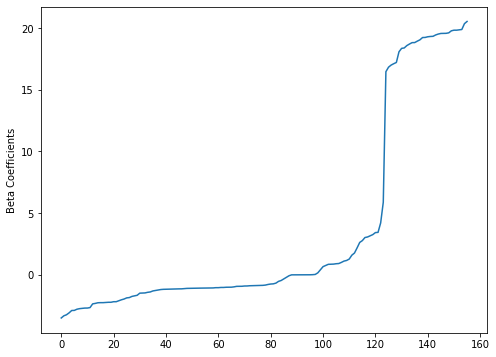

In [57]:
#Beta Coefficients Plot
plt.rcParams["figure.figsize"] = (8,6)
beta = np.sort(lrModel.coefficients)
plt.plot(beta)
plt.ylabel('Beta Coefficients')

In [58]:
#Coefficient Examine
coefsArray = np.array(lrModel.coefficients)  # convert to np.array
coefsDF = pd.DataFrame(coefsArray, columns=['coefs'])  # to pandas

coefsDF = coefsDF.merge(featureCols, left_index=True, right_index=True)  # join it with featureCols we created above
coefsDF.sort_values('coefs', inplace=True)  # Sort them
coefsDF.head()

,coefs,name
66,-3.494552,Ethnic_Description_Bosnian Muslim
112,-3.319268,Languages_Description_Japanese
127,-3.234615,Languages_Description_Lithuanian
124,-3.079958,Languages_Description_Urdu
68,-2.888209,Ethnic_Description_Malay


In [59]:
plt.rcParams["figure.figsize"] = (20,3)

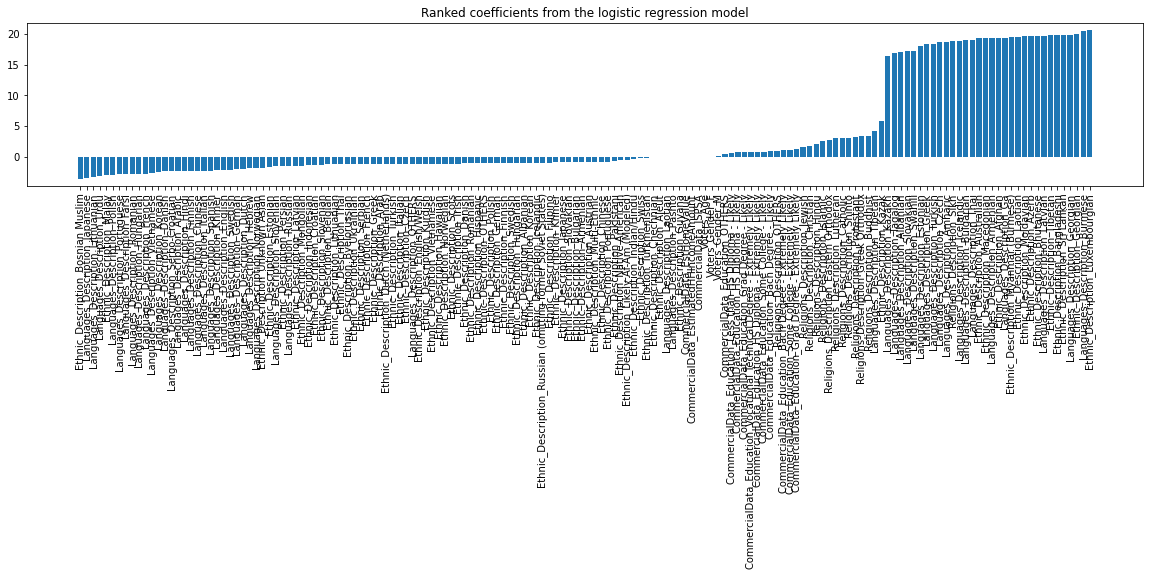

In [60]:
#Coefficients Visualization
plt.xticks(rotation=90)
plt.bar(coefsDF.name, coefsDF.coefs)
plt.title('Ranked coefficients from the logistic regression model')
plt.show()

In [61]:
#Get ROC Curve for the model
summary_lr = lrModel.summary
roc_lr = summary_lr.roc.toPandas()

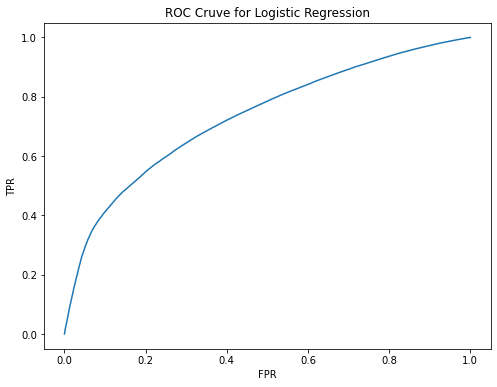

In [62]:
plt.rcParams["figure.figsize"] = (8,6)
roc_lr.plot(x='FPR', y='TPR', style='-', legend=False)
plt.title('ROC Cruve for Logistic Regression')
plt.ylabel('TPR')
plt.show()

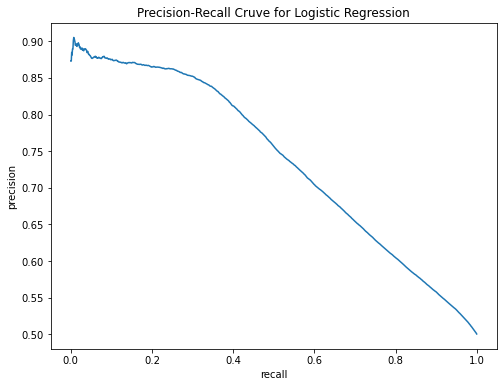

In [63]:
#Precision Recall Curve
pr_lr = summary_lr.pr.toPandas()
pr_lr.plot(x='recall', y='precision', style='-', legend=False)
plt.title('Precision-Recall Cruve for Logistic Regression')
plt.ylabel('precision')
plt.show()

In [64]:
#Prediction and True Value Comparison
y_predict_lr = lrModel.transform(test)
y_predict_lr.select("label", "prediction", "rawPrediction").show(5, False)

+-----+----------+----------------------------------------+
|label|prediction|rawPrediction                           |
+-----+----------+----------------------------------------+
|1.0  |0.0       |[1.028022322401973,-1.028022322401973]  |
|1.0  |1.0       |[-0.1974722310760556,0.1974722310760556]|
|1.0  |0.0       |[0.5759952420049941,-0.5759952420049941]|
|1.0  |0.0       |[0.7588063429097819,-0.7588063429097819]|
|1.0  |0.0       |[0.6902278512716813,-0.6902278512716813]|
+-----+----------+----------------------------------------+
only showing top 5 rows



In [65]:
#Training and Test AUC Comparison
from pyspark.ml.evaluation import BinaryClassificationEvaluator

aucEvaluator = BinaryClassificationEvaluator(metricName='areaUnderROC')
print('Test AUC:', aucEvaluator.evaluate(lrModel.transform(test)))
print('Train AUC:', summary_lr.areaUnderROC)

Test AUC: 0.731389530538872
Train AUC: 0.7320205163845591


In [66]:
classificationReport(y_predict_lr)


CONFUSION MATRIX:
TP:150916   FN:112842
FP:58854   TN:204020

Precision:0.7194355722934642
Recall   :0.5721760098271901
F1-score :0.6374110929026371
Accuracy :0.6739734767351775


#### Random Forest

In [67]:
# Random Forest Classifier 
from pyspark.ml import Pipeline
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.tuning import ParamGridBuilder, TrainValidationSplit
from pyspark.ml.evaluation import BinaryClassificationEvaluator

In [68]:
rf = RandomForestClassifier(labelCol = "label", featuresCol = "features", numTrees = 20)
rfModel = rf.fit(train)

In [69]:
#Get ROC Curve for the model
summary_rf = rfModel.summary
roc_rf = summary_rf.roc.toPandas()

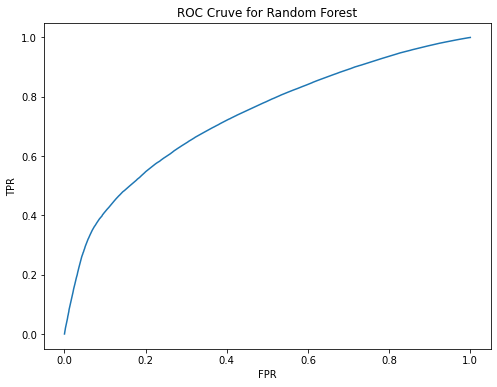

In [70]:
plt.rcParams["figure.figsize"] = (8,6)
roc_lr.plot(x='FPR', y='TPR', style='-', legend=False)
plt.title('ROC Cruve for Random Forest')
plt.ylabel('TPR')
plt.show()

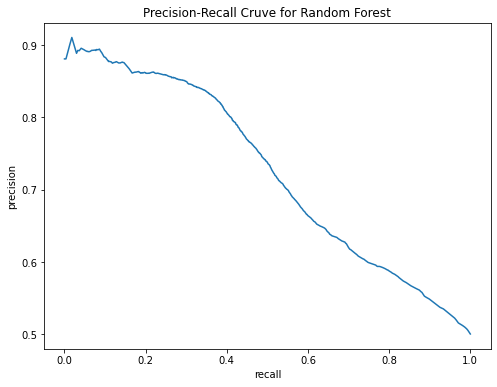

In [71]:
#Precision Recall Curve
pr_rf = summary_rf.pr.toPandas()
pr_rf.plot(x='recall', y='precision', style='-', legend=False)
plt.title('Precision-Recall Cruve for Random Forest')
plt.ylabel('precision')
plt.show()

In [72]:
print('Test AUC:', aucEvaluator.evaluate(rfModel.transform(test)))
print('Train AUC:', summary_rf.areaUnderROC)

Test AUC: 0.7113521967008166
Train AUC: 0.711407038688967


In [73]:
classificationReport(rfModel.transform(test))


CONFUSION MATRIX:
TP:134070   FN:129688
FP:49787   TN:213087

Precision:0.7292080258026619
Recall   :0.5083068570431987
F1-score :0.5990415870781811
Accuracy :0.6592022512874265


#### <font size = "4">Gradient-Boosted Tree Classifier

In [130]:
# Gradient-Boosted Tree Classifier
from pyspark.ml.classification import GBTClassifier

In [131]:
gb = GBTClassifier(labelCol = "label", featuresCol = "features")
gbModel = gb.fit(train)
y_predict_train_gb = gbModel.transform(train)
y_predict_test_gb = gbModel.transform(test)

In [133]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
binEval = MulticlassClassificationEvaluator().setMetricName("accuracy") .setPredictionCol("prediction").setLabelCol("label")

print('Test Accurancy:', binEval.evaluate(y_predict_test_gb))
print('Train Accurancy:', binEval.evaluate(y_predict_train_gb))

Test Accurancy: 0.694052013550259


Train Accurancy: 0.694328212805853


In [134]:
print('Test AUC:', aucEvaluator.evaluate(y_predict_train_gb))
print('Train AUC:', aucEvaluator.evaluate(y_predict_test_gb))

Test AUC: 0.7594638201291155


Train AUC: 0.7583201051199809


In [135]:
classificationReport(y_predict_test_gb )


CONFUSION MATRIX:
TP:156965   FN:106793
FP:54329   TN:208545

Precision:0.7428748568345528
Recall   :0.595109911358139
F1-score :0.6608329193435666
Accuracy :0.694052013550259


In [136]:
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder, TrainValidationSplit
paramGrid = ParamGridBuilder() \
    .addGrid(gb.subsamplingRate, [0.5,1]) \
    .addGrid(gb.maxIter,[10,20]) \
    .build()

In [137]:
tvs = TrainValidationSplit(estimator=gb,
                           estimatorParamMaps=paramGrid,
                           evaluator=BinaryClassificationEvaluator(),
                           trainRatio=0.8)

In [138]:
gb_Model = tvs.fit(train)

In [139]:
gb_prediction = gb_Model.transform(test)

In [141]:
best_model = gb_Model.bestModel
best_model

GBTClassificationModel: uid = GBTClassifier_4a90610b0c50, numTrees=20, numClasses=2, numFeatures=156

In [147]:
aucEvalucator = BinaryClassificationEvaluator(metricName='areaUnderROC')
print('Train AUC:', aucEvaluator.evaluate(gb_Model.transform(train)))
print('Test AUC:', aucEvaluator.evaluate(gb_Model.transform(test)))

Train AUC: 0.758893659716217


Test AUC: 0.7577800180366345


In [148]:
classificationReport(gb_prediction )


CONFUSION MATRIX:
TP:156888   FN:106870
FP:54490   TN:208384

Precision:0.7422153677298489
Recall   :0.5948179770850552
F1-score :0.6603919719827586
Accuracy :0.6936000850688906


#### <font size = "4"> Decision Tree

In [111]:
from pyspark.ml.classification import DecisionTreeClassifier

In [112]:
dt = DecisionTreeClassifier(labelCol = "label", featuresCol = "features")
dtModel = dt.fit(train)

y_predict_train_dt = dtModel.transform(train)
y_predict_test_dt = dtModel.transform(test)

In [113]:
print('Test Accurancy:', binEval.evaluate(y_predict_train_dt))
print('Train Accurancy:', binEval.evaluate(y_predict_test_dt))

Test Accurancy: 0.6819356620207498


Train Accurancy: 0.681375229761959


In [114]:
print('Test AUC:', aucEvaluator.evaluate(y_predict_test_dt))
print('Train AUC:', aucEvaluator.evaluate(y_predict_train_dt))

Test AUC: 0.5692579556929459


Train AUC: 0.569697341511415


In [115]:
classificationReport(y_predict_test_dt)


CONFUSION MATRIX:
TP:137029   FN:126729
FP:41069   TN:221805

Precision:0.7694022392166111
Recall   :0.5195254741088422
F1-score :0.620242794032445
Accuracy :0.681375229761959


## <b> Conclusion </b>
<font size = "3.5"> After the EDA, we found general patterns consistently appear in CA, TX, and ME, such as active voters are older on average. More people with higher social-economical positions are active voters. Generally, active voters have a higher level of education, but since inactive voters are younger, we can't say this phenomenon shows a causal relationship. Besides, we found people in CA are more active in voting. In California, people younger and with lower social-economical positions participate in vo. The result is consistent with people's impression of CA that California is a young and democratic state. Patterns in Maine are similar to Texas in terms of voters' demographic analysis, except Maine has the highest average voting age.
  
 
<font size = "3.5">For the Machine learning part, we select columns with the least null values and make the most sense of prediction. We filled the nulls with the mean for numerical columns; with 'others' for categorical columns. Then, we rebalanced the data by oversampling the data by 0.5 to 0.5 to make the model fair. For example, though the precision is high (0.99), the model doesn't predict inactive voters. We fitted four models.  Gradient Boost performs the best based on the confusion matrix. After trying tuning, the highest Test AUC score is 0.758.</font>


<font size = "5"> <b>Limitation and Next Steps</b>
    
<font size = "3.5">Since we have limited resources and time, we only used part of the dataset to do the machine learning. For a better practice, using more data, more features, and feature engineering would be the next step. Besides, using more data from more states, aggregating the dataset based on counties or precincts could be a good idea, but we only have demographic data, in which age is one of the crucial features. Therefore, we didn't find this method to work well.  </font>

<font size = "5"> <b> Challenges and Solutions

<font size = "3.5"> For this project, we met many chanllenges, and we found ways to solve problems</font>
<font size = "3.5"><p>Firstly, because the dataset is huge, we found it took a long time to process files. Therefore, we selected the columns we needed, then saved the smaller file as a parquet file to the team cloud storage. Later, accessing the parquet file takes a shorter time.</font> 
<font size = "3.5"><p>Secondly, there are many null values in the original dataset. We have to decide whether to drop the entire column or make reasonable assumptions to fill the nulls. Being unbiased and interpretable are the metrics we use to drop columns. 
<font size = "3.5"><p>Thirdly, in the data visualization process, we found out there were so many categorical attributes on the same axis that we couldn't plot all of them. Thus we only picked the top quantity attributes to plot to reflect the general trend. Lastly, we are still working on applying machine learning to our datasets. It is difficult to predict based on only one year's voters' data.
<font size = "3.5"> During Machine learning, our kernel dies multiple times due to the large dataset. We select columns that make sense to predict and clean the data by replacing categorical null values with others.</font>